In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits.mplot3d import Axes3D

import os # accessing directory structure
import re
from PIL import Image
from wordcloud import *
from bs4 import BeautifulSoup

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm
import gc
import random

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk import pos_tag, RegexpParser

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

import spacy
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix

import spacy
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix

# Load spaCy English NER model
nlp = spacy.load('en_core_web_lg')

import torch
import torch.nn as nn
import torch.optim as optim

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

import time
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2024-04-25 21:04:05.083511: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 21:04:05.083619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 21:04:05.229007: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Create a directory if it doesn't exist
directory = '/kaggle/working/images'
if not os.path.exists(directory):
    os.makedirs(directory)

/kaggle/input/fake-job-recuitment-dataset/generated_data.csv
/kaggle/input/recruitment-scam/DataSet.csv


In [3]:
# read the csv into a pandas dataframe
df = pd.read_csv('/kaggle/input/recruitment-scam/DataSet.csv')
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [5]:
df.describe()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
count,17880,17534,6333,2868,14572,17880,15191,10684,17880,17880,17880,14409,10830,9775,12977,11425,17880,17880
unique,11231,3105,1337,874,1710,15095,12119,6510,2,2,2,5,7,13,131,37,2,2
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,<p>We help teachers get safe &amp; secure jobs...,"<p>Play with kids, get paid for it </p>\r\n<p>...",<p>University degree required. TEFL / TESOL / ...,<p>See job description</p>,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,f,f
freq,311,718,551,142,726,376,410,726,17113,14220,9088,11620,3809,5145,1734,1749,17014,16980


In [6]:
df = df.drop(['in_balanced_dataset'], axis=1)
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f


## Exploratory Data Analysis


##### Performing EDA on the original Data
Understanding the behaviour of Fraudulent class w.r.t Non Fraudulent class based on following few columns first:

* telecommuting
* has_comapany_logo
* has_questions
* employment_type
* required_experience
* required_education
* industry
* function

In [7]:
def addlabels(plot,x,y):
    for i in range(len(x)):
        plot.text(i, y[i], y[i], ha = 'center', style='oblique', weight='bold')

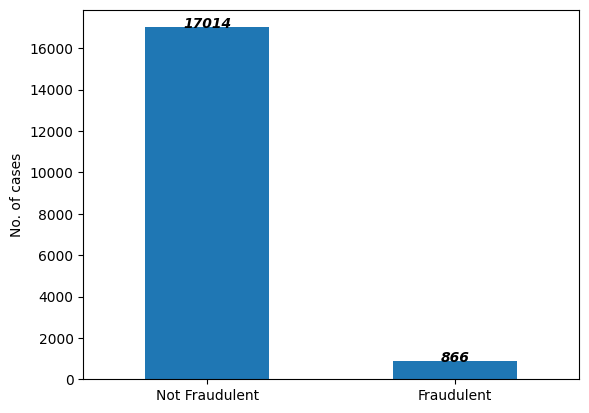

In [8]:
fradulent_samples = df.loc[df['fraudulent'] == 't']
non_fradulent_samples = df.loc[df['fraudulent'] == 'f']
value_counts_fraudulent = df['fraudulent'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_fraudulent.plot(kind='bar')

label_list_fraudulent = list(range(0,len(value_counts_fraudulent)))
addlabels(plt,label_list_fraudulent,value_counts_fraudulent)
plt.xticks([0,1],['Not Fraudulent', 'Fraudulent'], rotation=0)
plt.ylabel('No. of cases')
plt.xlabel('')

# Save the plot to a file
plt.savefig('images/totalCases.png')

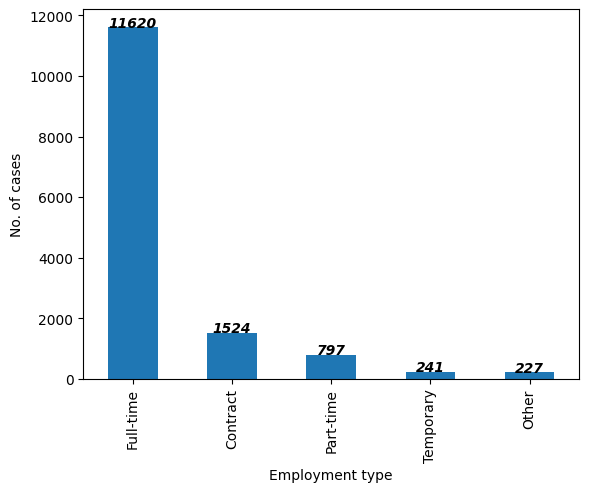

In [9]:
value_counts_employment_type = df['employment_type'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_employment_type.plot(kind='bar')

label_list_employment_type = list(range(0,len(value_counts_employment_type)))
addlabels(plt,label_list_employment_type,value_counts_employment_type)
plt.ylabel('No. of cases')
plt.xlabel('Employment type')

# Save the plot to a file
plt.savefig('images/totalEmploymentCases.png')

In [10]:
def compare_plot_fraudulent_and_nonfraudulent_class(df, feature, tag="original", nrows=1, ncols=2):
    # Filter the DataFrame for fraudulent cases being 'f' and 't'
    filtered_df_f = df.loc[df['fraudulent'] == 'f']
    filtered_df_t = df.loc[df['fraudulent'] == 't']

    # Calculate value counts for employment_type in both filtered DataFrames
    value_counts_f = filtered_df_f[feature].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
    value_counts_t = filtered_df_t[feature].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()

    # Create a figure and axes for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

    # Plot the bar plots for fraudulent 'f' cases
    value_counts_f.plot(kind='bar', ax=axes[0], color='b', alpha=0.5)
    axes[0].set_title('Non Fraudulent Cases')
    axes[0].set_ylabel('Frequency')
    ax0_list = list(range(0,len(value_counts_f)))
    addlabels(axes[0],ax0_list,value_counts_f)

    # Plot the bar plots for fraudulent 't' cases
    value_counts_t.plot(kind='bar', ax=axes[1], color='r', alpha=0.6)
    axes[1].set_title('Fraudulent Cases')
    axes[1].set_ylabel('Frequency')
    ax1_list = list(range(0,len(value_counts_t)))
    addlabels(axes[1],ax1_list,value_counts_t)

    plt.tight_layout()  # Adjust layout to prevent overlap
    # Save the plot to a file
    if tag is not "fake":
        plt.savefig(f"images/compare_{feature}.png")
    else:
        plt.savefig(f"images/fake_compare_{feature}.png")
    plt.show()


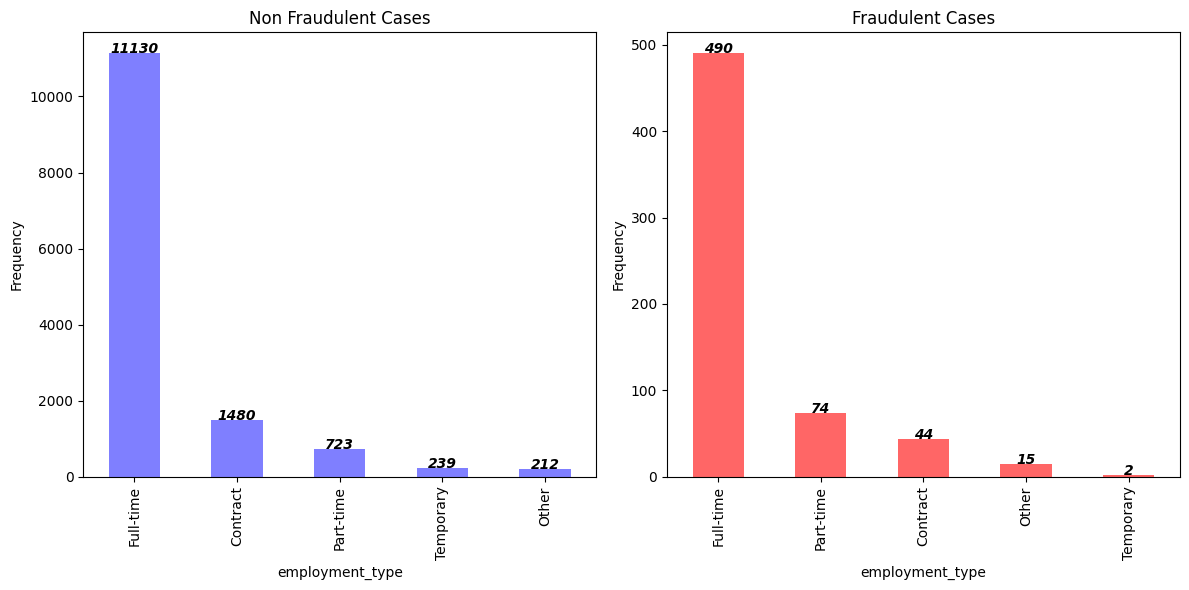

In [11]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'employment_type')

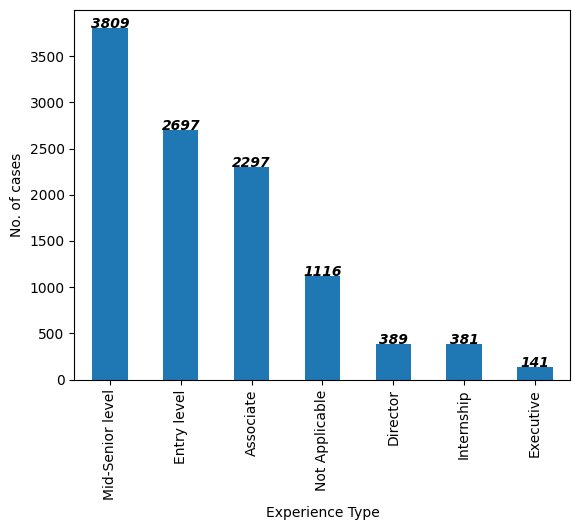

In [12]:
value_counts_required_experience = df['required_experience'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_required_experience.plot(kind='bar')

label_list_required_experience = list(range(0,len(value_counts_required_experience)))
addlabels(plt,label_list_required_experience,value_counts_required_experience)
plt.ylabel('No. of cases')
plt.xlabel('Experience Type')

# Save the plot to a file
plt.savefig('images/totalExperienceType.png')

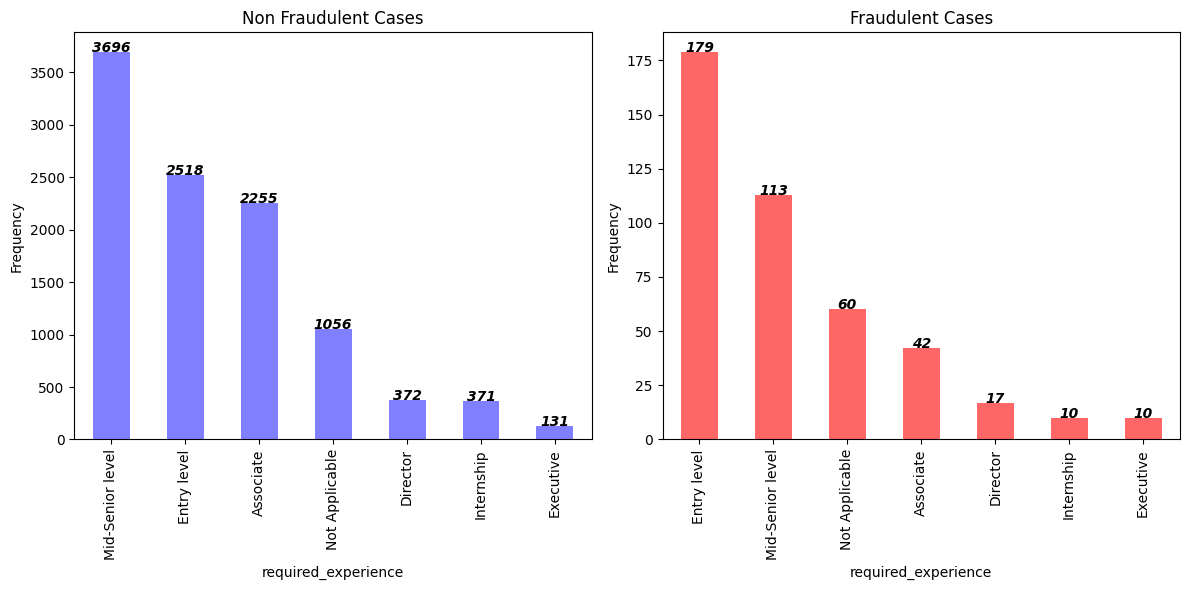

In [13]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'required_experience')

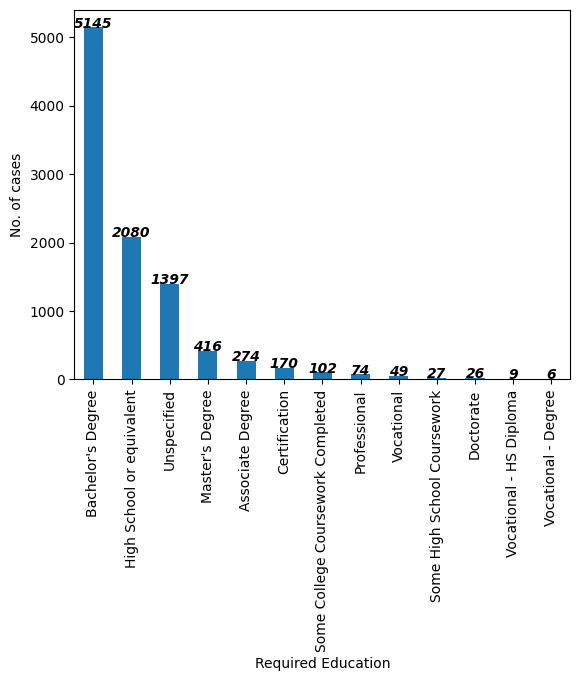

In [14]:
value_counts_required_education = df['required_education'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_required_education.plot(kind='bar')

label_list_required_education = list(range(0,len(value_counts_required_education)))
addlabels(plt,label_list_required_education,value_counts_required_education)
plt.ylabel('No. of cases')
plt.xlabel('Required Education')

# Save the plot to a file
plt.savefig('images/totalRequiredEducationType.png')

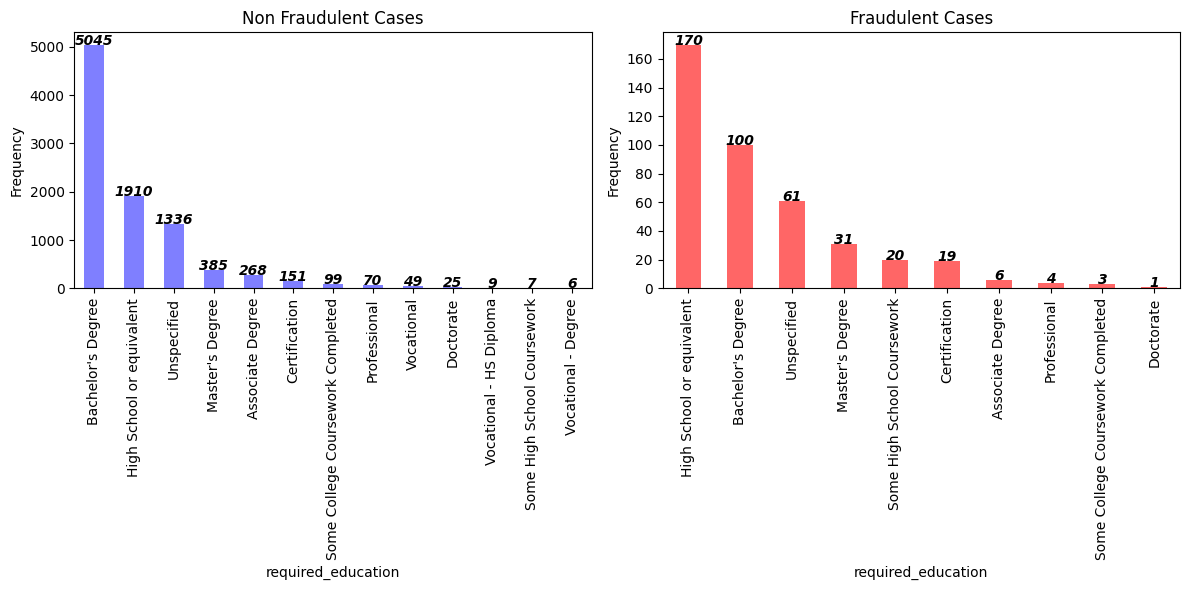

In [15]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'required_education')

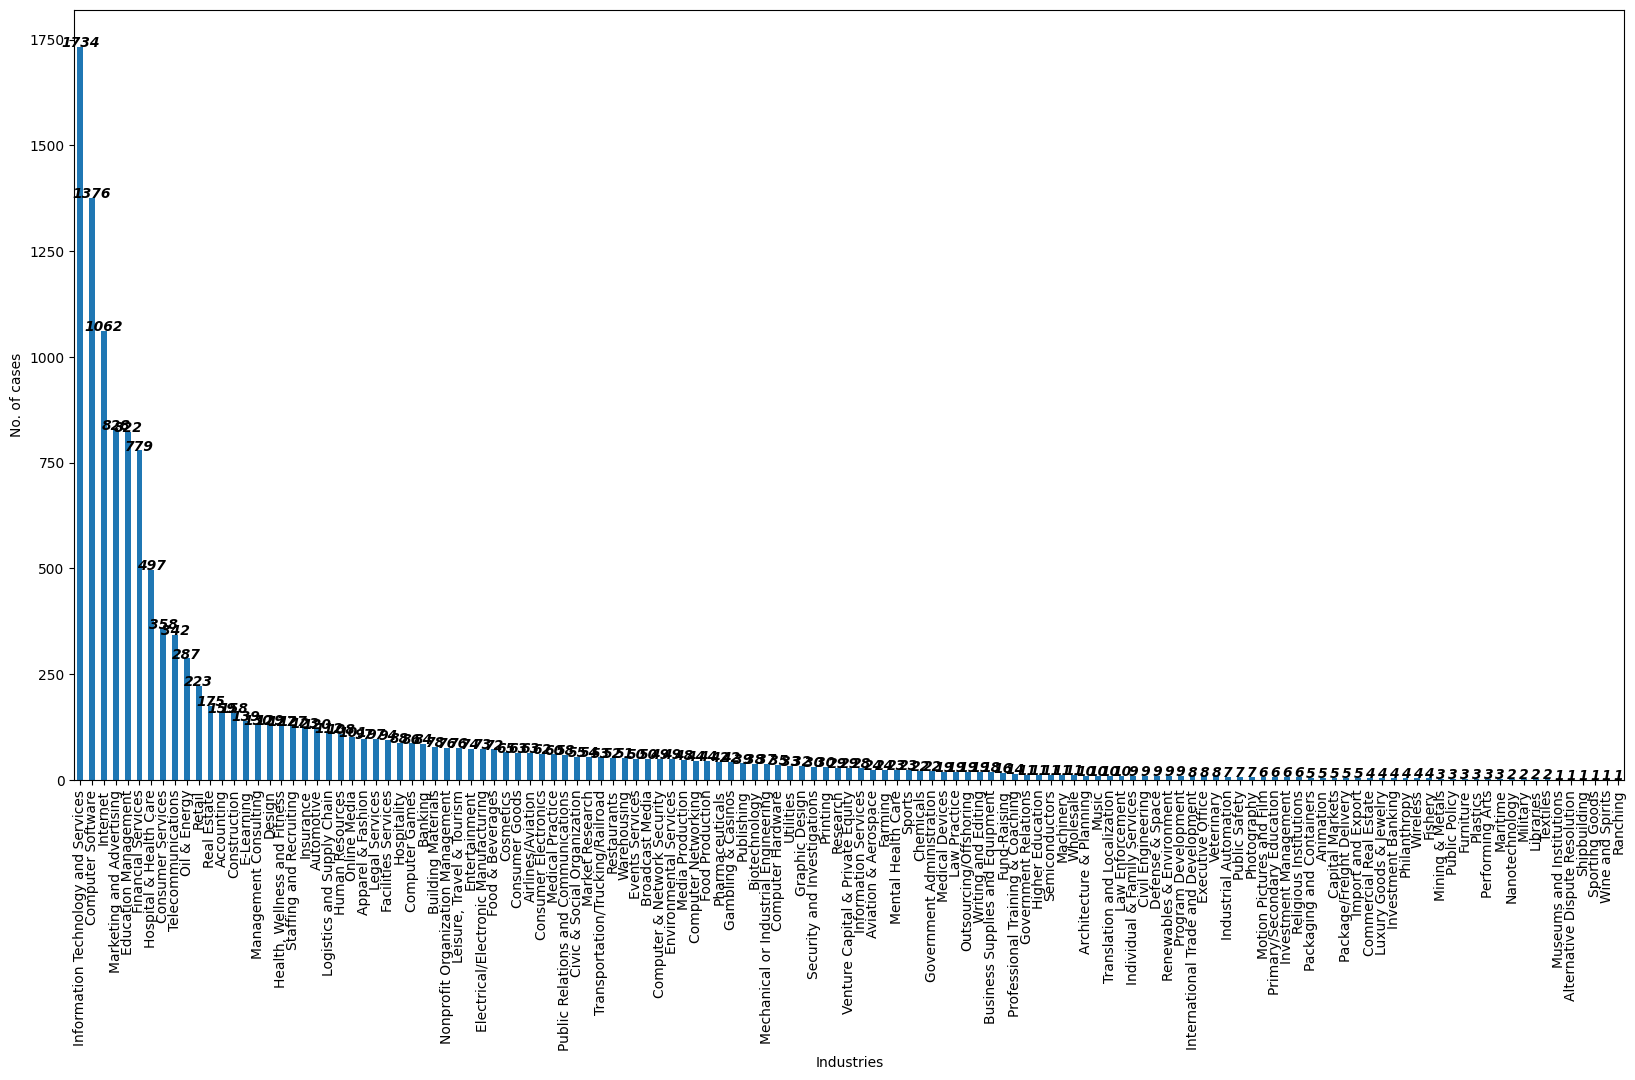

In [16]:
value_counts_industry = df['industry'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_industry.plot(kind='bar',figsize=(20,10))

label_list_industry = list(range(0,len(value_counts_industry)))
addlabels(plt,label_list_industry,value_counts_industry)
plt.ylabel('No. of cases')
plt.xlabel('Industries')

# Save the plot to a file
plt.savefig('images/totalIndustriesType.png')

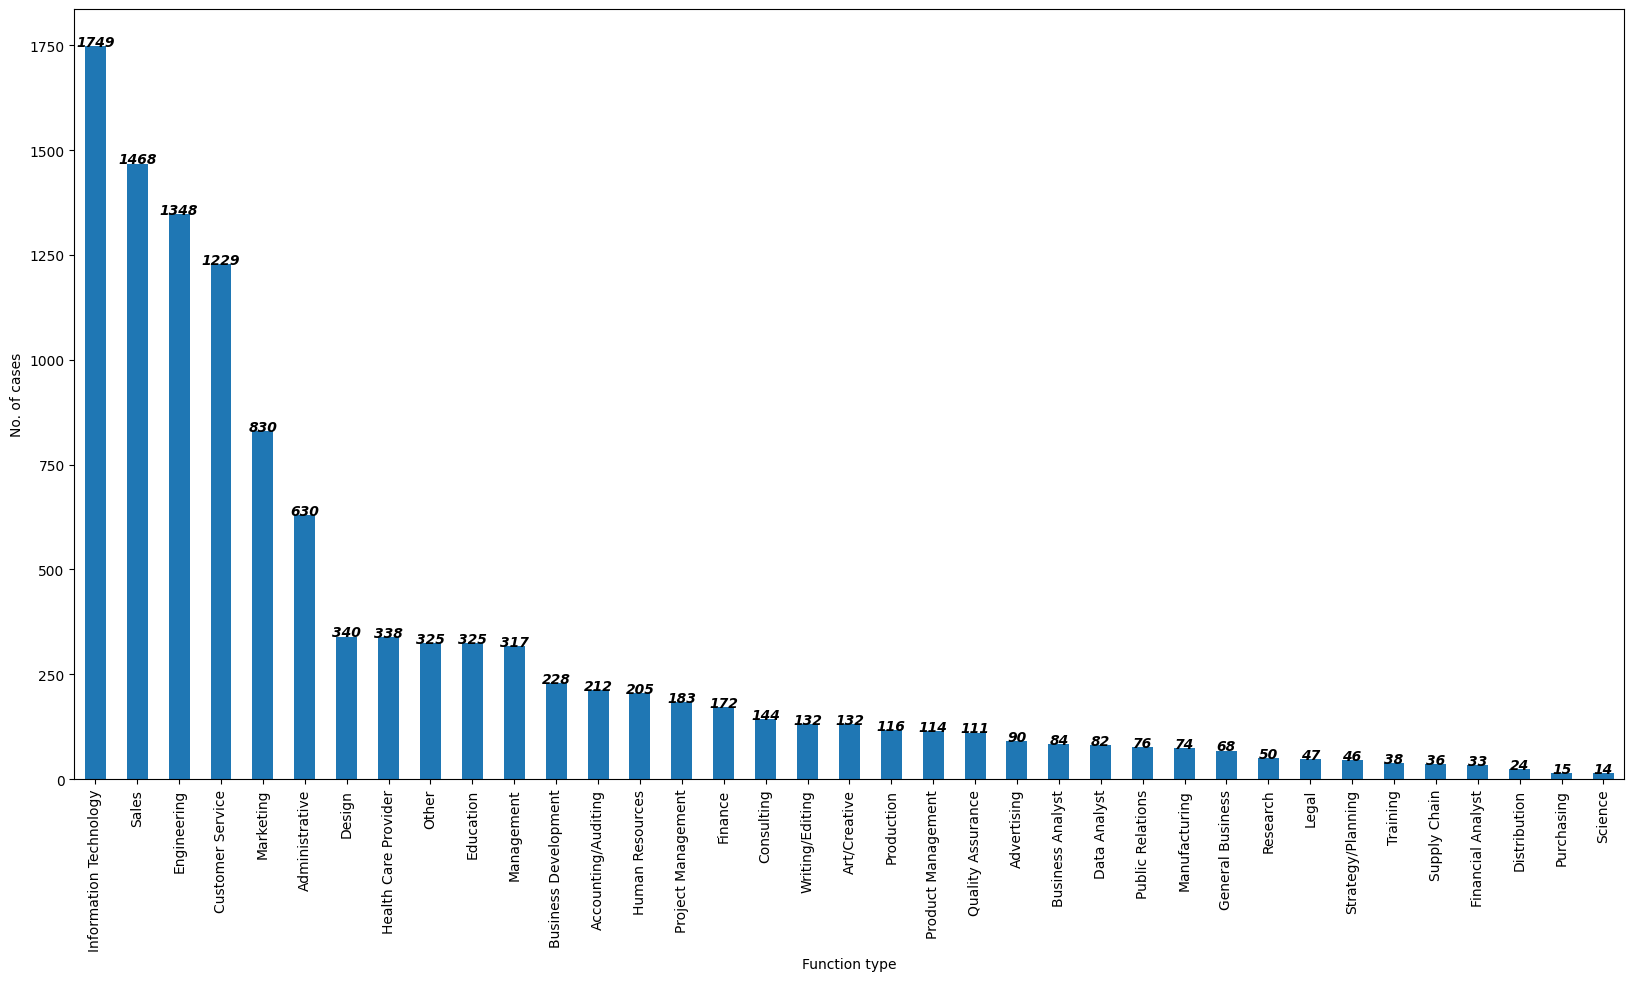

In [17]:
value_counts_function = df['function'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_function.plot(kind='bar',figsize=(20,10))

label_list_function = list(range(0,len(value_counts_function)))
addlabels(plt,label_list_function,value_counts_function)
plt.ylabel('No. of cases')
plt.xlabel('Function type')

# Save the plot to a file
plt.savefig('images/totalFunctionType.png')

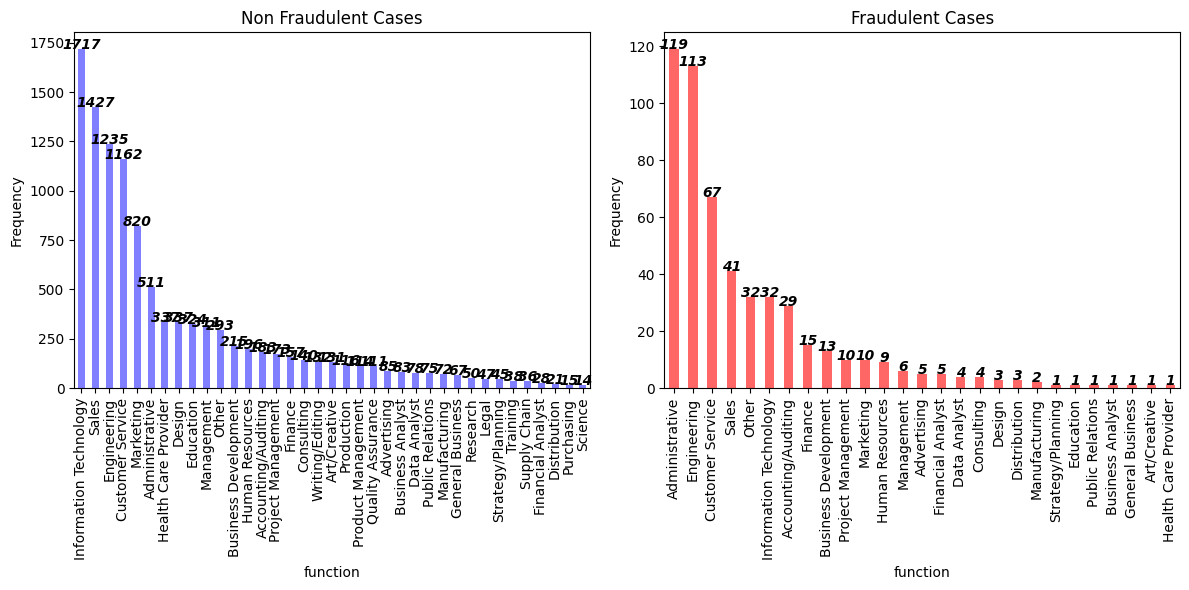

In [18]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'function')

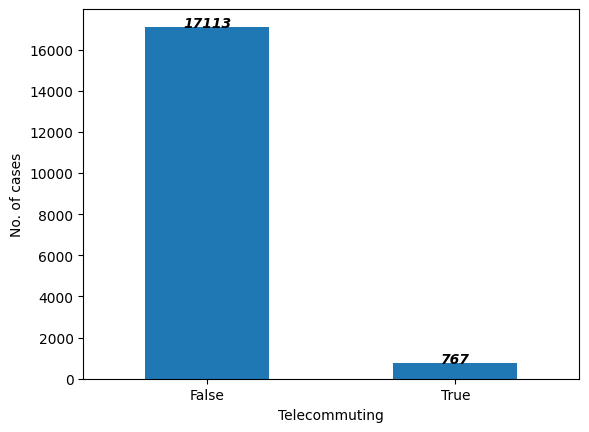

In [19]:
value_counts_telecommuting = df['telecommuting'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_telecommuting.plot(kind='bar')

label_list_telecommuting = list(range(0,len(value_counts_telecommuting)))
addlabels(plt,label_list_telecommuting,value_counts_telecommuting)
plt.xticks([0,1],['False', 'True'], rotation=0)
plt.ylabel('No. of cases')
plt.xlabel('Telecommuting')

# Save the plot to a file
plt.savefig('images/totalTelecommutingCases.png')

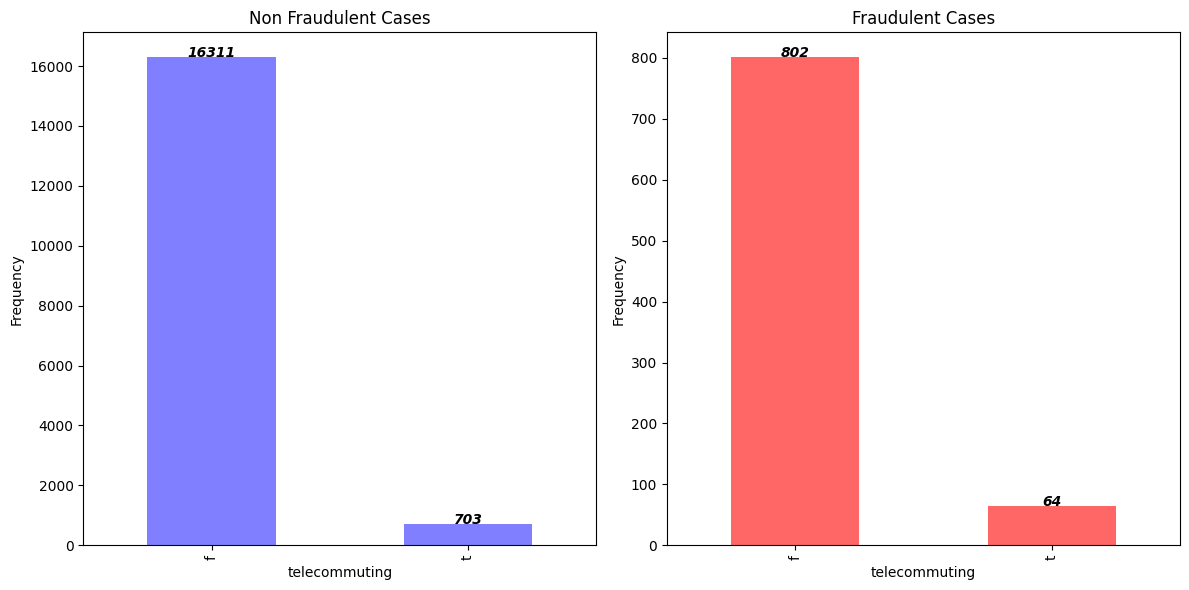

In [20]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'telecommuting')

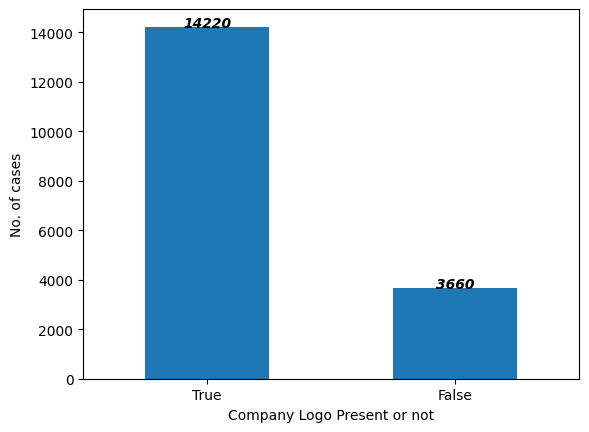

In [21]:
value_counts_has_company_logo = df['has_company_logo'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_has_company_logo.plot(kind='bar')

label_list_has_company_logo = list(range(0,len(value_counts_has_company_logo)))
addlabels(plt,label_list_has_company_logo,value_counts_has_company_logo)
plt.xticks([0,1],['True', 'False'], rotation=0)
plt.ylabel('No. of cases')
plt.xlabel('Company Logo Present or not')

# Save the plot to a file
plt.savefig('images/totalLogoCases.png')

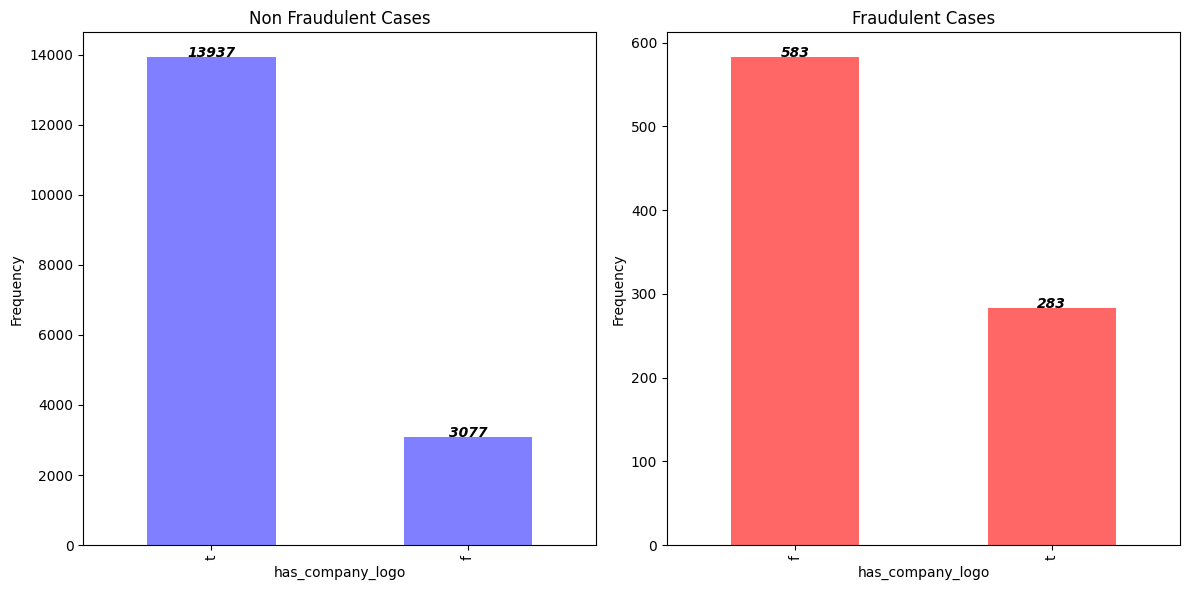

In [22]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'has_company_logo')

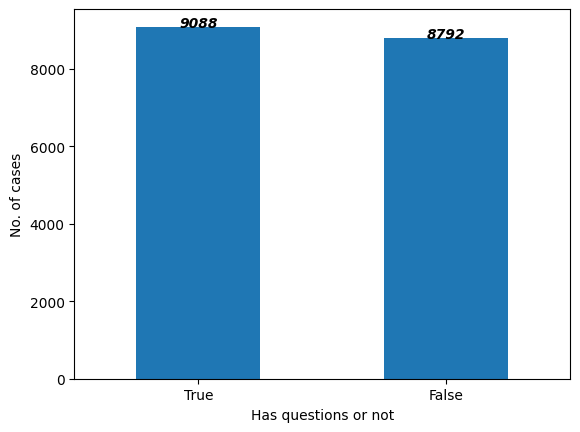

In [23]:
value_counts_has_questions = df['has_questions'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_has_questions.plot(kind='bar')

label_list_has_questions = list(range(0,len(value_counts_has_questions)))
addlabels(plt,label_list_has_questions,value_counts_has_questions)
plt.xticks([0,1],['True', 'False'], rotation=0)
plt.ylabel('No. of cases')
plt.xlabel('Has questions or not')

# Save the plot to a file
plt.savefig('images/totalQuestionCases.png')

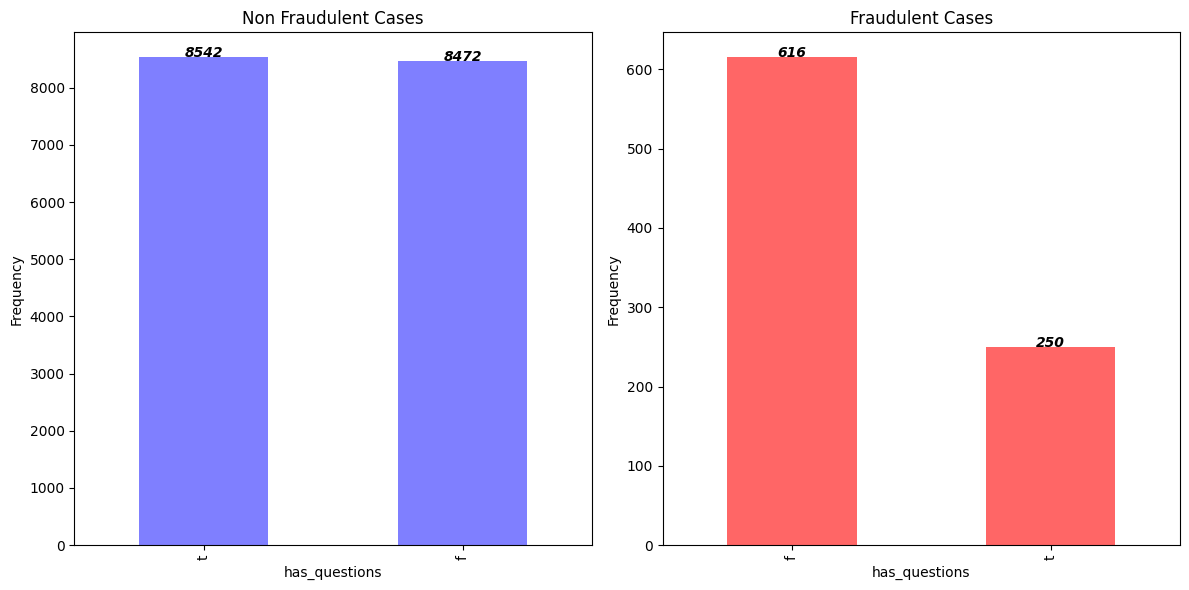

In [24]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'has_questions')

In [25]:
# Extracting the country from the location column
def extract_country(value):
    if isinstance(value, str):
        items = [item.strip() for item in value.split(',')]
        if len(items) > 0 and len(items[0]) > 0:
            return items[0]
    return np.nan

# extract the country from the location
df['country'] = df['location'].apply(lambda x: extract_country(x))

df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,US
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,CA
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,US
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,US
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,NG


In [26]:
# We will drop all categorical values that have too many options (above one percent of dataset)
df = df.drop(['location', 'department'], axis=1)

In [27]:
# print all chars used in title
chars = set()
for idx, value in non_fradulent_samples.title.items():
    if isinstance(value, str):
        chars.update(set(value))
print(chars)

{'?', 'r', ')', 'p', '9', 'D', 'j', 'G', 'v', 'R', '6', ':', ' ', 'z', '\\', 'P', 'x', 'b', '~', ']', 'k', 'o', 'Y', '+', '$', '/', '0', 'q', 'L', 'N', '!', 'm', 'I', 's', 'Z', '-', 'B', 'O', '3', 'T', 'H', 'F', 'u', 'a', '1', 'V', '7', 'X', '8', 'w', 'E', 't', 'W', '4', 'i', 'U', '"', '\t', 'A', 'J', 'M', '@', "'", '|', '*', 'l', '(', 'd', 'g', '&', 'Q', 'K', '5', '#', 'h', 'S', 'C', '.', '%', 'f', 'e', 'y', '2', '[', '_', 'n', 'c', ','}


In [28]:
# print all chars used in title
chars_fradulent = set()
for idx, value in fradulent_samples.title.items():
    if isinstance(value, str):
        chars_fradulent.update(set(value))
print(chars)

{'?', 'r', ')', 'p', '9', 'D', 'j', 'G', 'v', 'R', '6', ':', ' ', 'z', '\\', 'P', 'x', 'b', '~', ']', 'k', 'o', 'Y', '+', '$', '/', '0', 'q', 'L', 'N', '!', 'm', 'I', 's', 'Z', '-', 'B', 'O', '3', 'T', 'H', 'F', 'u', 'a', '1', 'V', '7', 'X', '8', 'w', 'E', 't', 'W', '4', 'i', 'U', '"', '\t', 'A', 'J', 'M', '@', "'", '|', '*', 'l', '(', 'd', 'g', '&', 'Q', 'K', '5', '#', 'h', 'S', 'C', '.', '%', 'f', 'e', 'y', '2', '[', '_', 'n', 'c', ','}


Its is seen that there is not difference between characters used in the Title of Fradulent Job advertisement and Non Fradulent Job advertisement

#### As we are able to see that the dataset is heavily skewed.¶

#### So we generated dataset for fake job cases and merged that data with the original data

In [29]:
# read the csv into a pandas dataframe
df_fake = pd.read_csv('/kaggle/input/fake-job-recuitment-dataset/generated_data.csv')

df_fake

,Unnamed: 0,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,17221,Health + Safety Professional,"US, OK, Oklahoma City",Clerical,2000-2000,<p>We have aggressive growth plans in place fo...,<p><b>Apply using below link </b></p>\r\n<p><b...,<ul>\r\n<li>Maintain attention and concentrati...,<p>Sales Executive</p>,f,f,f,Full-time,NaN,NaN,Banking,Administrative,t,t
1,15644,Health + Safety Professional,"US, CA,",Engineering,NaN,NaN,<p>We are currently looking for a client-focus...,<p>Offshore or onsite is ok.</p>\r\n<p> Durati...,<p>We offer</p>\r\n<p>• Friendly colleagues in...,f,f,t,Full-time,NaN,NaN,NaN,NaN,t,f
2,16326,Facilities Development Engineer,"US, CA,",Engineering,NaN,"<p><img src=""#URL_a31880b95ada3459e9067539bf1b...","<h3><img src=""file:#EMAIL_57a097453f1e8230376d...",<p>Key Qualifications:</p>\r\n<ul>\r\n<li>Mini...,<p>All you need is access to the Internet and ...,f,t,f,Full-time,NaN,High School or equivalent,NaN,Administrative,t,t
3,15519,SAP Support Advisor,"US, IL, hazelcrest",NaN,30000-40000,NaN,<p>As an Administrative Assistant you will be...,<p>Must have at least 3 years experience in a ...,<p>Salary:119k CAD</p>\r\n<p>skype: #URL_d55e4...,f,f,t,Full-time,Entry level,NaN,Banking,NaN,t,t
4,98,SAP Support Advisor,"US, AL, ALEXANDER CITY",Engineering,NaN,<p><b>The Accion story began more than 100 ye...,<p>Colonial is looking for 5 sharp people to i...,<p>Skills and Specifications:</p>\r\n<p>* Must...,<p>Sales Executive</p>,f,f,t,Full-time,Entry level,NaN,NaN,NaN,t,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,16203,HSE Manager,"US, FL,",MAIL UNIT 65036,NaN,NaN,<p>The maintenance supervisor is responsible f...,<p>Qualifications &amp; personal attributes <b...,<p>All you need is access to the Internet and ...,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,f
4996,15977,SAP Support Advisor,"US, CA,",biotech,2000-3000,NaN,<p>Colonial is looking for 5 sharp people to i...,"<p>Positive attitude, high integrity,<br>Basic...",<p>Sales Executive</p>,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,f
4997,98,Informatica/ Etl Tester,"US, IL, hazelcrest",NaN,45000-70000,NaN,"<p><img src=""#URL_8c6c20a628a1b59ab4cd0e264525...",<p>Qualifications &amp; personal attributes</p...,<p>Sales Executive</p>,f,f,t,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,t,f
4998,15703,SAP Support Advisor,"US, PA, Philadelphia",Oil & Energy,65000-85000,<p><i><b>With decades of experience and more t...,<p>At Puget Sound<br>Energy (PSE) we have a lo...,<p>Skills/Qualifications:<br>- Post-secondary ...,<h3>What Is Offered</h3>\r\n<p>Our client's co...,f,t,f,NaN,Entry level,Master's Degree,NaN,NaN,t,f


In [30]:
# extract the country from the location
df_fake['country'] = df_fake['location'].apply(lambda x: extract_country(x))

# We will drop all categorical values that have too many options (above one percent of dataset)
df_fake = df_fake.drop(['Unnamed: 0', 'location', 'department', 'in_balanced_dataset'], axis=1)

df_fake

,title,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Health + Safety Professional,2000-2000,<p>We have aggressive growth plans in place fo...,<p><b>Apply using below link </b></p>\r\n<p><b...,<ul>\r\n<li>Maintain attention and concentrati...,<p>Sales Executive</p>,f,f,f,Full-time,NaN,NaN,Banking,Administrative,t,US
1,Health + Safety Professional,NaN,NaN,<p>We are currently looking for a client-focus...,<p>Offshore or onsite is ok.</p>\r\n<p> Durati...,<p>We offer</p>\r\n<p>• Friendly colleagues in...,f,f,t,Full-time,NaN,NaN,NaN,NaN,t,US
2,Facilities Development Engineer,NaN,"<p><img src=""#URL_a31880b95ada3459e9067539bf1b...","<h3><img src=""file:#EMAIL_57a097453f1e8230376d...",<p>Key Qualifications:</p>\r\n<ul>\r\n<li>Mini...,<p>All you need is access to the Internet and ...,f,t,f,Full-time,NaN,High School or equivalent,NaN,Administrative,t,US
3,SAP Support Advisor,30000-40000,NaN,<p>As an Administrative Assistant you will be...,<p>Must have at least 3 years experience in a ...,<p>Salary:119k CAD</p>\r\n<p>skype: #URL_d55e4...,f,f,t,Full-time,Entry level,NaN,Banking,NaN,t,US
4,SAP Support Advisor,NaN,<p><b>The Accion story began more than 100 ye...,<p>Colonial is looking for 5 sharp people to i...,<p>Skills and Specifications:</p>\r\n<p>* Must...,<p>Sales Executive</p>,f,f,t,Full-time,Entry level,NaN,NaN,NaN,t,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HSE Manager,NaN,NaN,<p>The maintenance supervisor is responsible f...,<p>Qualifications &amp; personal attributes <b...,<p>All you need is access to the Internet and ...,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,US
4996,SAP Support Advisor,2000-3000,NaN,<p>Colonial is looking for 5 sharp people to i...,"<p>Positive attitude, high integrity,<br>Basic...",<p>Sales Executive</p>,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,US
4997,Informatica/ Etl Tester,45000-70000,NaN,"<p><img src=""#URL_8c6c20a628a1b59ab4cd0e264525...",<p>Qualifications &amp; personal attributes</p...,<p>Sales Executive</p>,f,f,t,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,t,US
4998,SAP Support Advisor,65000-85000,<p><i><b>With decades of experience and more t...,<p>At Puget Sound<br>Energy (PSE) we have a lo...,<p>Skills/Qualifications:<br>- Post-secondary ...,<h3>What Is Offered</h3>\r\n<p>Our client's co...,f,t,f,NaN,Entry level,Master's Degree,NaN,NaN,t,US


In [31]:
df = pd.concat([df, df_fake], axis=0)
df

,title,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,US
1,Customer Service - Cloud Video Production,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,NZ
2,Commissioning Machinery Assistant (CMA),NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,US
3,Account Executive - Washington DC,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,US
4,Bill Review Manager,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HSE Manager,NaN,NaN,<p>The maintenance supervisor is responsible f...,<p>Qualifications &amp; personal attributes <b...,<p>All you need is access to the Internet and ...,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,US
4996,SAP Support Advisor,2000-3000,NaN,<p>Colonial is looking for 5 sharp people to i...,"<p>Positive attitude, high integrity,<br>Basic...",<p>Sales Executive</p>,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,US
4997,Informatica/ Etl Tester,45000-70000,NaN,"<p><img src=""#URL_8c6c20a628a1b59ab4cd0e264525...",<p>Qualifications &amp; personal attributes</p...,<p>Sales Executive</p>,f,f,t,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,t,US
4998,SAP Support Advisor,65000-85000,<p><i><b>With decades of experience and more t...,<p>At Puget Sound<br>Energy (PSE) we have a lo...,<p>Skills/Qualifications:<br>- Post-secondary ...,<h3>What Is Offered</h3>\r\n<p>Our client's co...,f,t,f,NaN,Entry level,Master's Degree,NaN,NaN,t,US


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22880 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                22880 non-null  object
 1   salary_range         4716 non-null   object
 2   company_profile      15764 non-null  object
 3   description          22880 non-null  object
 4   requirements         20188 non-null  object
 5   benefits             15684 non-null  object
 6   telecommuting        22880 non-null  object
 7   has_company_logo     22880 non-null  object
 8   has_questions        22880 non-null  object
 9   employment_type      18829 non-null  object
 10  required_experience  13572 non-null  object
 11  required_education   11453 non-null  object
 12  industry             16807 non-null  object
 13  function             13844 non-null  object
 14  fraudulent           22880 non-null  object
 15  country              22480 non-null  object
dtypes: object(

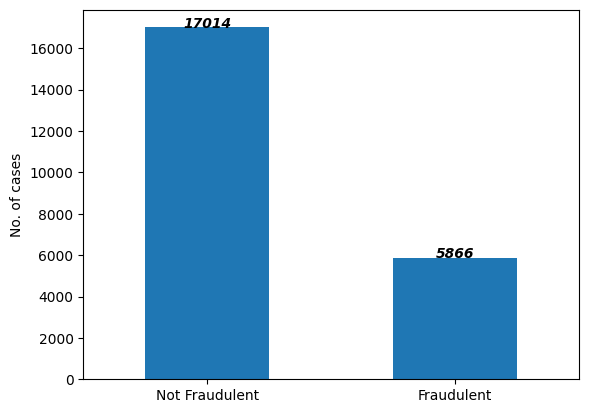

In [33]:
fake_fradulent_samples = df.loc[df['fraudulent'] == 't']
fake_non_fradulent_samples = df.loc[df['fraudulent'] == 'f']
fake_value_counts_fraudulent = df['fraudulent'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
fake_value_counts_fraudulent.plot(kind='bar')

fake_label_list_fraudulent = list(range(0,len(value_counts_fraudulent)))
addlabels(plt,fake_label_list_fraudulent,fake_value_counts_fraudulent)
plt.xticks([0,1],['Not Fraudulent', 'Fraudulent'], rotation=0)
plt.ylabel('No. of cases')
plt.xlabel('')

# Save the plot to a file
plt.savefig('images/fake_totalCases.png')

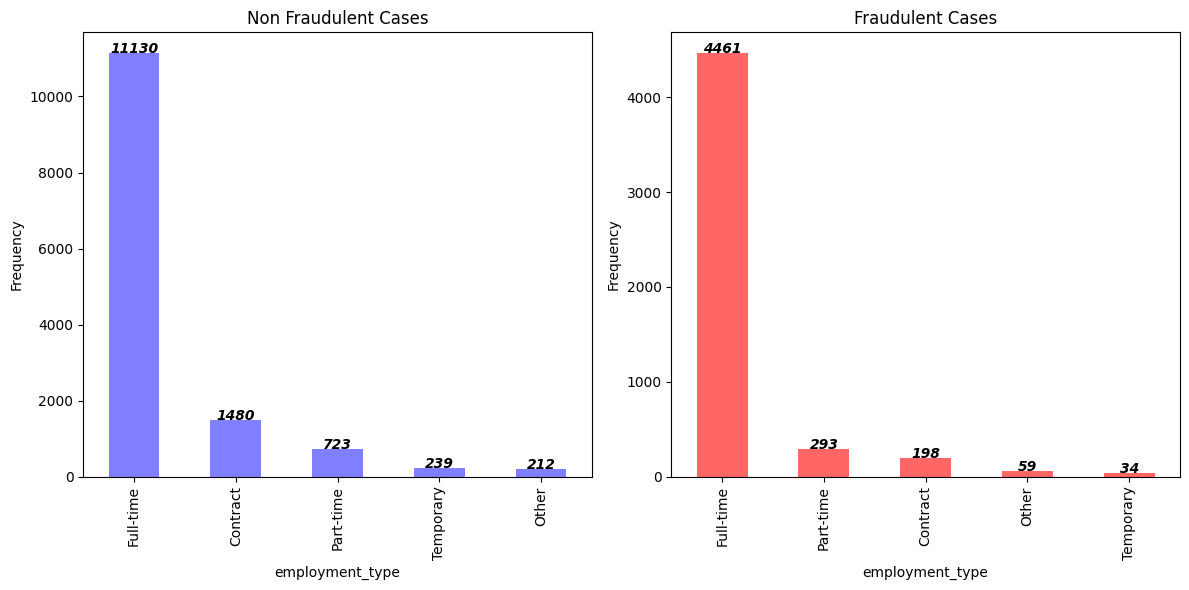

In [34]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'employment_type','fake')

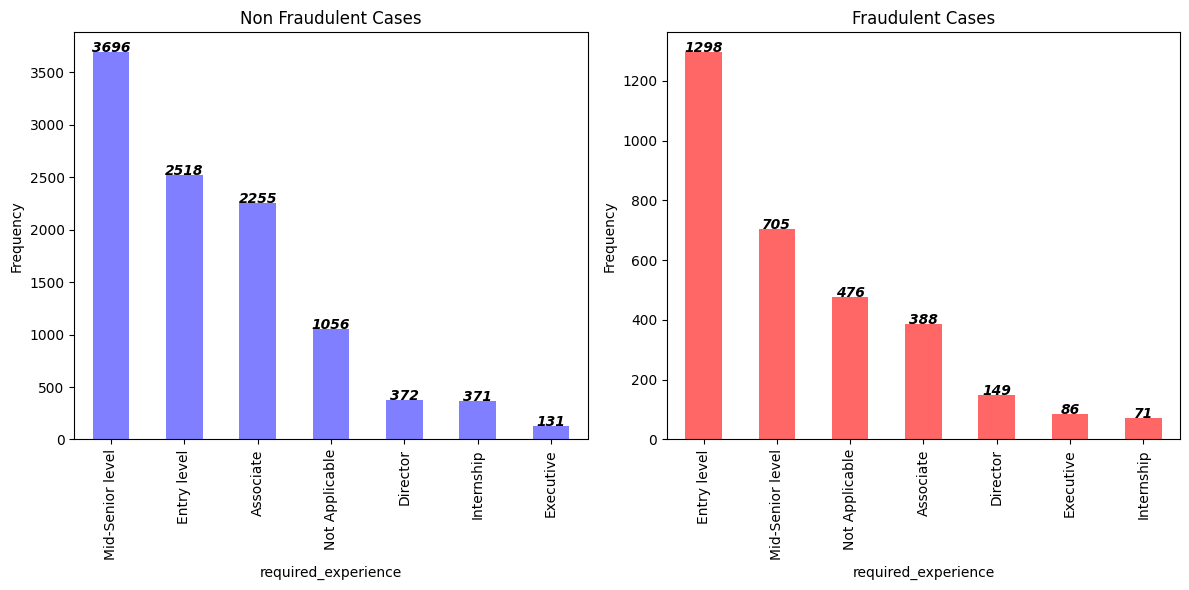

In [35]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'required_experience','fake')

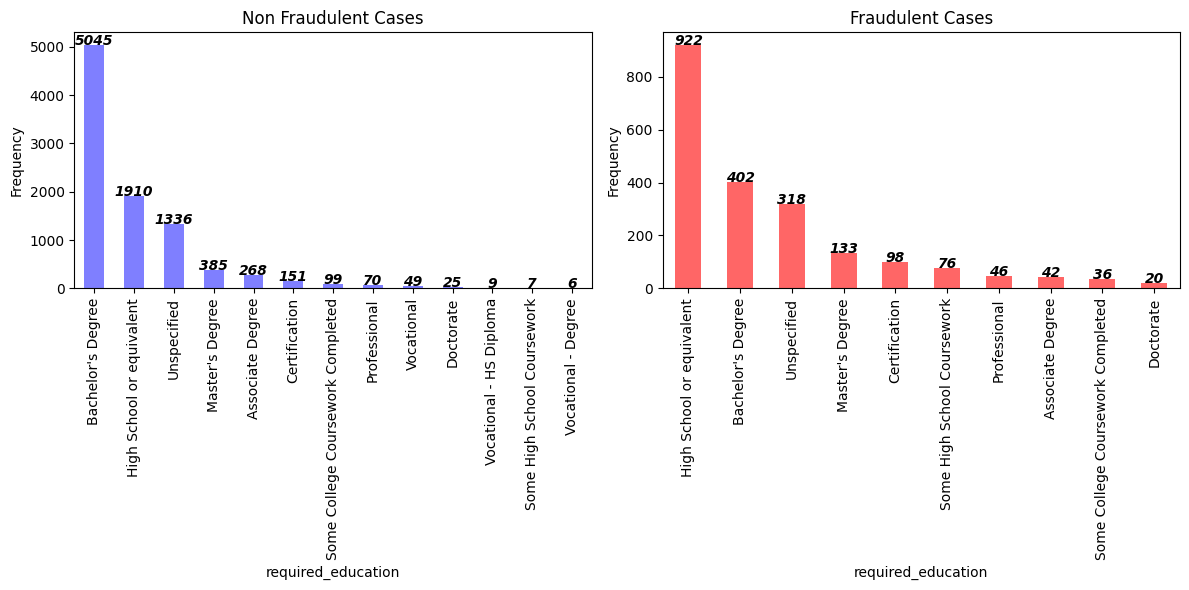

In [36]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'required_education','fake')

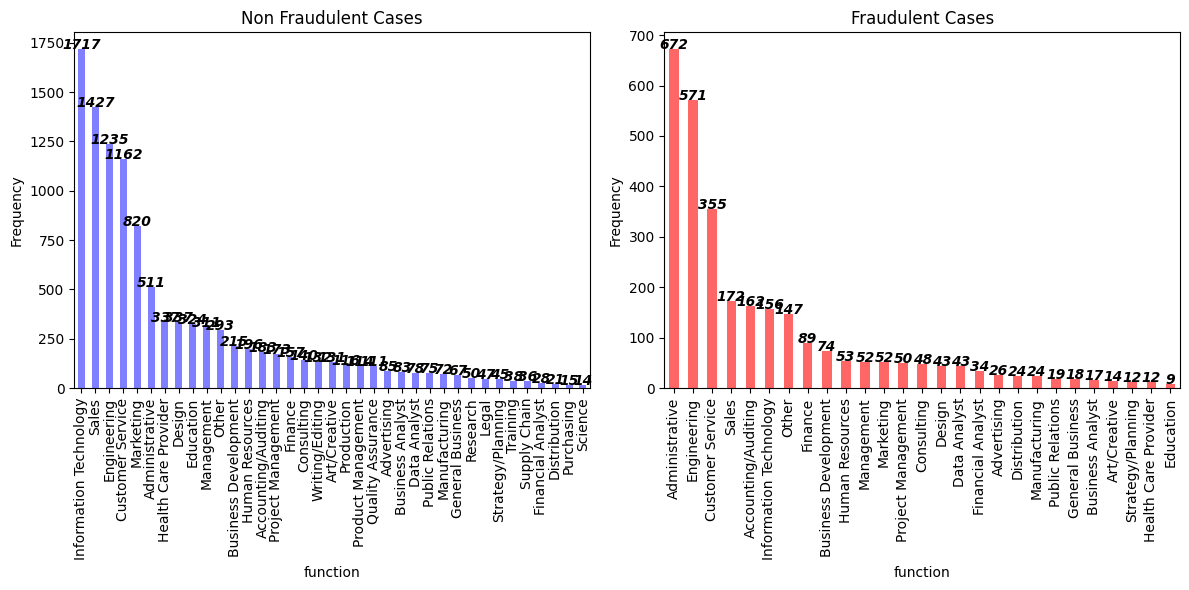

In [37]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'function','fake')

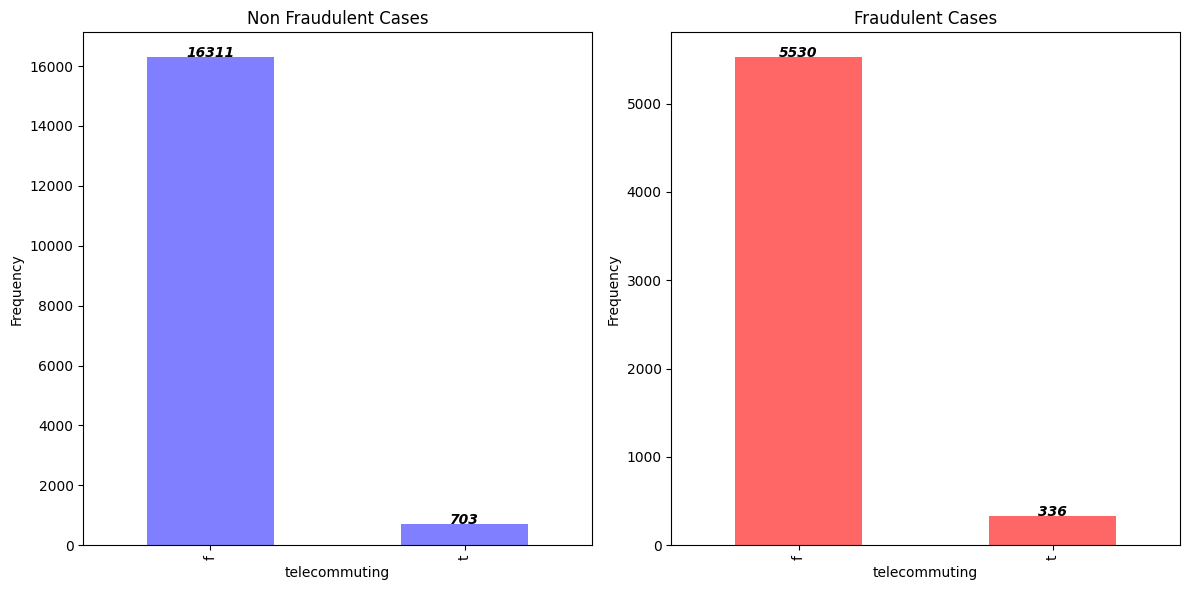

In [38]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'telecommuting','fake')

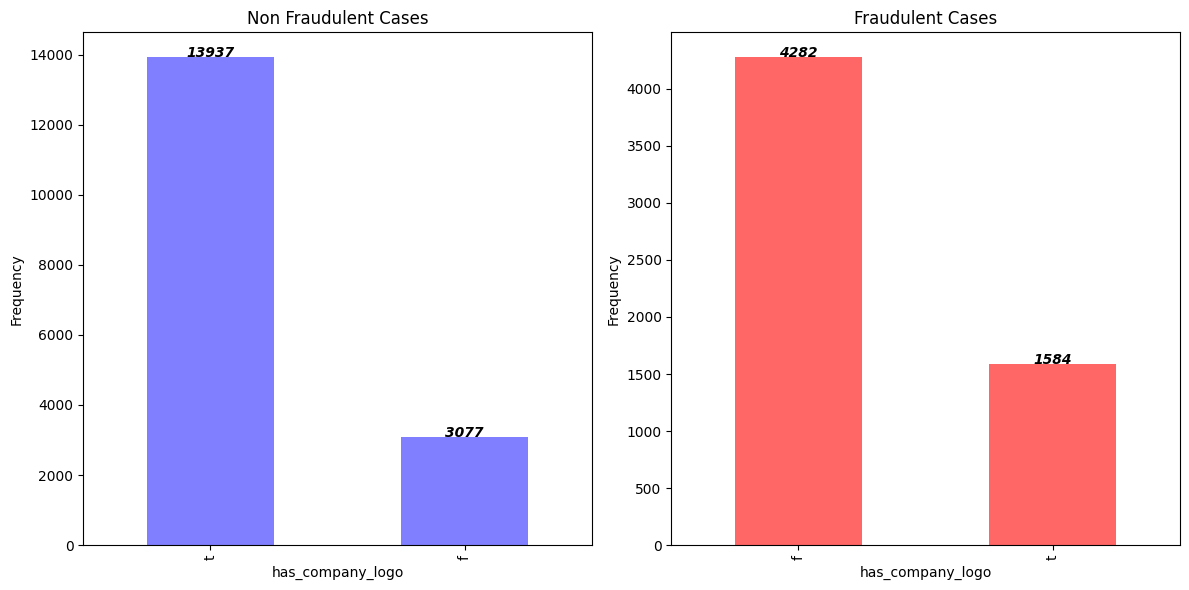

In [39]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'has_company_logo','fake')

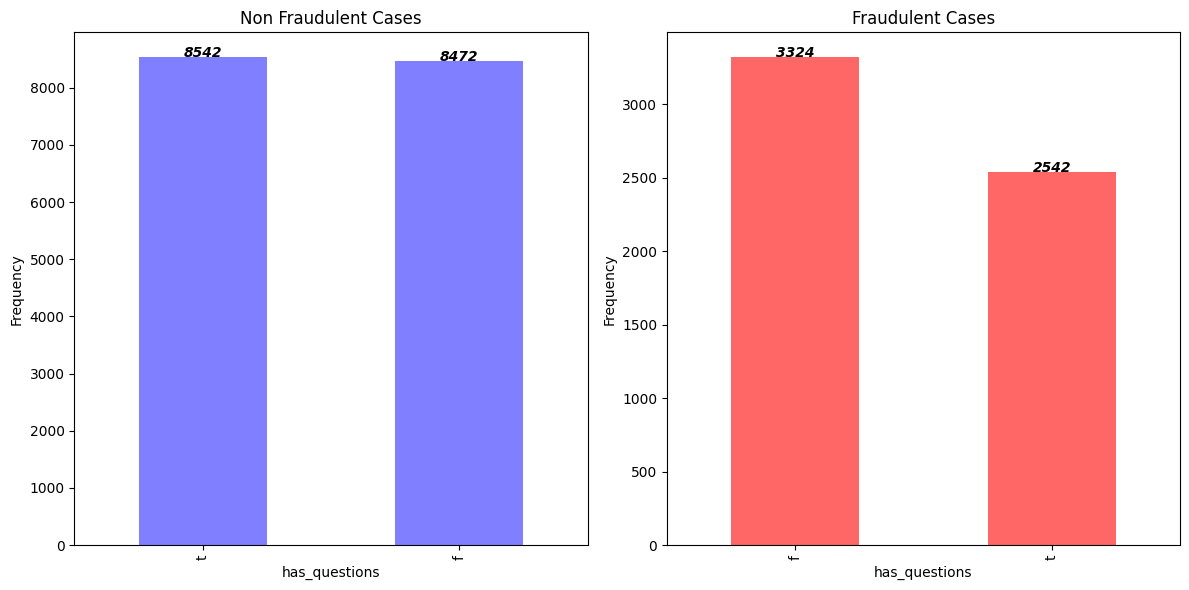

In [40]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'has_questions','fake')

## Text Processing

#### After performing good amount of EDA on the dataset. Now performing Text preprocessing in it to clean the dataset from unwanted characters and focus on important words only

In [41]:
df['title_company_profile_description_requirements_benefits'] = df['title'] + ' ' + df ['company_profile'].fillna('').map(str) + ' ' + df ['description'].fillna('').map(str) + ' ' + df ['requirements'].fillna('').map(str) + ' ' + df ['benefits'].fillna('').map(str)
df = df.drop(['title', 'company_profile','description', 'requirements', 'benefits'], axis=1)
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,title_company_profile_description_requirements_benefits
0,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,US,"Marketing Intern <h3>We're Food52, and we've c..."
1,NaN,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,NZ,Customer Service - Cloud Video Production <h3>...
2,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,US,Commissioning Machinery Assistant (CMA) <h3></...
3,NaN,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,US,Account Executive - Washington DC <p>Our passi...
4,NaN,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,US,Bill Review Manager <p>SpotSource Solutions LL...
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,US,HSE Manager <p>The maintenance supervisor is ...
4996,2000-3000,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,US,SAP Support Advisor <p>Colonial is looking fo...
4997,45000-70000,f,f,t,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,t,US,"Informatica/ Etl Tester <p><img src=""#URL_8c6..."
4998,65000-85000,f,t,f,NaN,Entry level,Master's Degree,NaN,NaN,t,US,SAP Support Advisor <p><i><b>With decades of e...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22880 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   salary_range                                             4716 non-null   object
 1   telecommuting                                            22880 non-null  object
 2   has_company_logo                                         22880 non-null  object
 3   has_questions                                            22880 non-null  object
 4   employment_type                                          18829 non-null  object
 5   required_experience                                      13572 non-null  object
 6   required_education                                       11453 non-null  object
 7   industry                                                 16807 non-null  object
 8   function                                  

In [43]:
# droping the rows where 'title_company_profile_description_requirements_benefits' column contains NULL
df.dropna(subset=['title_company_profile_description_requirements_benefits','fraudulent'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22880 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   salary_range                                             4716 non-null   object
 1   telecommuting                                            22880 non-null  object
 2   has_company_logo                                         22880 non-null  object
 3   has_questions                                            22880 non-null  object
 4   employment_type                                          18829 non-null  object
 5   required_experience                                      13572 non-null  object
 6   required_education                                       11453 non-null  object
 7   industry                                                 16807 non-null  object
 8   function                                  

In [44]:
def remove_bullet_points(text):
    # Define pattern to match bullet points
    bullet_point_pattern = re.compile(r'\s*[\u2022\u2023\u25E6]\s*')  # Matches •, ‣, and ◦ bullet points

    # Remove bullet points from the text
    cleaned_text = bullet_point_pattern.sub(' ', text)
    
    return cleaned_text

In [45]:
def remove_emojis_and_symbols_from_text(text):
    # Define pattern to match emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           u"\u00ae" # trade Marks ®
                           u"\u00A9" # copy Right ©
                           u"\u2122" # Trade Mark TM
                           u"\u200b"
                           "]+", flags=re.UNICODE)
    # Remove emojis from the text
    cleaned_text = emoji_pattern.sub(r' ', text)
    return cleaned_text

In [46]:
def decontraction(x):
    contractions = {
        "you've": 'you have',
        "you're": 'you are',
        "haven't": 'have not',
        "hasn't": 'has not',
        "hadn't've": 'had not have',
        "hadn't": 'had not',
        "don't": 'do not',
        "doesn't": 'does not',
        "didn't": 'did not',
        "couldn't've": 'could not have',
        "couldn't": 'could not',
        "could've": 'could have',
        "'cause": 'because',
        "can't've": 'cannot have',
        "aren't": 'are not',
        "ain't": 'am not',
        "can't": 'can not',
        "won't": 'will not',
        "he'd": 'he would',
        "he'd've": 'he would have',
        "he'll": 'he will',
        "he'll've": 'he will have',
        "he's": 'he is',
        "how'd": 'how did',
        "how'd'y": 'how do you',
        "how'll": 'how will',
        "how's": 'how does',
        "i'd": 'i would',
        "i'd've": 'i would have',
        "i'll": 'i will',
        "i'll've": 'i will have',
        "i'm": 'i am',
        "i've": 'i have',
        "isn't": 'is not',
        "it'd": 'it would',
        "it'd've": 'it would have',
        "it'll": 'it will',
        "it'll've": 'it will have',
        "it's": 'it is',
        "let's": 'let us',
        "ma'am": 'madam',
        "mayn't": 'may not',
        "might've": 'might have',
        "mightn't": 'might not',
        "mightn't've": 'might not have',
        "must've": 'must have',
        "mustn't": 'must not',
        "mustn't've": 'must not have',
        "needn't": 'need not',
        "needn't've": 'need not have',
        "o'clock": 'of the clock',
        "oughtn't": 'ought not',
        "oughtn't've": 'ought not have',
        "shan't": 'shall not',
        "sha'n't": 'shall not',
        "shan't've": 'shall not have',
        "she'd": 'she would',
        "she'd've": 'she would have',
        "she'll": 'she will',
        "she'll've": 'she will have',
        "she's": 'she is',
        "should've": 'should have',
        "shouldn't": 'should not',
        "shouldn't've": 'should not have',
        "so've": 'so have',
        "so's": 'so is',
        "that'd": 'that would',
        "that'd've": 'that would have',
        "that's": 'that is',
        "there'd": 'there would',
        "there'd've": 'there would have',
        "there's": 'there is',
        "they'd": 'they would',
        "they'd've": 'they would have',
        "they'll": 'they will',
        "they'll've": 'they will have',
        "they're": 'they are',
        "they've": 'they have',
        "to've": 'to have',
        "wasn't": 'was not',
        "we're": 'we are',
        "'s": " is",
        "n't": ' not',
        "'re": ' are',
        "'d": ' would',
        "'ll": ' will',
        "'t": ' not',
        "'ve": ' have',
        "'m": ' am',
        ' u ': ' you ',
        ' ur ': ' your ',
        ' n ': ' and '
    }
    
    contractions_comma = {
        "you’ve": 'you have',
        "you’re": 'you are',
        "haven’t": 'have not',
        "hasn’t": 'has not',
        "hadn’t've": 'had not have',
        "hadn’t": 'had not',
        "don’t": 'do not',
        "doesn’t": 'does not',
        "didn’t": 'did not',
        "couldn’t’ve": 'could not have',
        "couldn’t": 'could not',
        "could’ve": 'could have',
        "’cause": 'because',
        "can’t’ve": 'cannot have',
        "aren’t": 'are not',
        "ain’t": 'am not',
        "can’t": 'can not',
        "won’t": 'will not',
        "he’d": 'he would',
        "he'd've": 'he would have',
        "he’ll": 'he will',
        "he’ll’ve": 'he will have',
        "he’s": 'he is',
        "how’d": 'how did',
        "how’d'y": 'how do you',
        "how’ll": 'how will',
        "how’s": 'how does',
        "i’d": 'i would',
        "i’d’ve": 'i would have',
        "i’ll": 'i will',
        "i’ll’ve": 'i will have',
        "i’m": 'i am',
        "i’ve": 'i have',
        "isn’t": 'is not',
        "it’d": 'it would',
        "it’d’ve": 'it would have',
        "it’ll": 'it will',
        "it'll've": 'it will have',
        "it’s": 'it is',
        "let's": 'let us',
        "ma’am": 'madam',
        "mayn’t": 'may not',
        "might’ve": 'might have',
        "mightn’t": 'might not',
        "mightn’t've": 'might not have',
        "must’ve": 'must have',
        "mustn’t": 'must not',
        "mustn’t’ve": 'must not have',
        "needn’t": 'need not',
        "needn’t’ve": 'need not have',
        "o’clock": 'of the clock',
        "oughtn’t": 'ought not',
        "oughtn’t’ve": 'ought not have',
        "shan’t": 'shall not',
        "sha’n’t": 'shall not',
        "shan’t’ve": 'shall not have',
        "she’d": 'she would',
        "she’d’ve": 'she would have',
        "she’ll": 'she will',
        "she’ll’ve": 'she will have',
        "she’s": 'she is',
        "should’ve": 'should have',
        "shouldn’t": 'should not',
        "shouldn't've": 'should not have',
        "so’ve": 'so have',
        "so's": 'so is',
        "that’d": 'that would',
        "that’d've": 'that would have',
        "that’s": 'that is',
        "there’d": 'there would',
        "there’d’ve": 'there would have',
        "there’s": 'there is',
        "they’d": 'they would',
        "they’d've": 'they would have',
        "they’ll": 'they will',
        "they’ll've": 'they will have',
        "they’re": 'they are',
        "they’ve": 'they have',
        "to’ve": 'to have',
        "wasn’t": 'was not',
        "we’re": 'we are',
        "’s": " is",
        "n’t": ' not',
        "’re": ' are',
        "’d": ' would',
        "’ll": ' will',
        "’t": ' not',
        "’ve": ' have',
        "’m": ' am',
        ' u ': ' you ',
        ' ur ': ' your ',
        ' n ': ' and '
    }
    
    for key in contractions:
        value = contractions[key]
        x = x.replace(key, value)
        
    for key in contractions_comma:
        value = contractions_comma[key]
        x = x.replace(key, value)
    return x

def removepunc(x):
    punctuation = '!\xad\xa0\xe2\x80\x9d\xe2\x80\x99\xe2\x80\xa2()*+-/:;<=>[]^_`{|}~@#,.?$%&"”“’‘\'…<>«»'
    translation_table = str.maketrans(punctuation, ' ' * len(punctuation))
    return x.translate(translation_table)

def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, ' ', text)

def remove_ampersand(text):
    text = text.replace('&amp;', '')
    text = text.replace('andamp;', '')
    return text

In [47]:
def remove_code_from_text(text):
    # Defining the pattern to match the code
    code_pattern = r'\b[0-9a-fA-F]{64}\b'  # Assuming the code is a 64-character hexadecimal string

    # Remove the code from the text
    cleaned_text = re.sub(code_pattern, ' ', text)

    return cleaned_text

In [48]:
def remove_number_from_text(text):
    # Defining the pattern to match the code
    number_pattern = r'[0-9]'  # Assuming the code is a 64-character hexadecimal string

    # Remove the code from the text
    cleaned_text = re.sub(number_pattern, ' ', text)

    return cleaned_text

In [49]:
def remove_greek_words(text):
    # Define pattern to match Greek words
    greek_pattern = re.compile(r'\b[α-ωΑ-Ωίϊΐόάέύϋΰήώ]+\b', flags=re.IGNORECASE)

    # Remove Greek words from the text
    cleaned_text = greek_pattern.sub(' ', text)
    
    return cleaned_text

In [50]:
def remove_russian_words(text):
    # Define pattern to match Russian words
    russian_pattern = re.compile(r'\b[а-яА-Я]+\b')  # Matches Russian words

    # Remove Russian words from the text
    cleaned_text = russian_pattern.sub('', text)
    
    return cleaned_text

In [51]:
def remove_thai_words(text):
    # Remove Thai characters using regular expression
    cleaned_text = re.sub(r'[\u0E00-\u0E7F]', ' ', text)
    
    return cleaned_text

In [52]:
def remove_currency_symbols(text):
    # Define pattern to match currency symbols
    currency_pattern = re.compile(r'[$€¥₹£¢₽₩₪₴₱₨฿₦₮₲₭₵₿]')  # Matches any currency symbol

    # Remove currency symbols from the text
    cleaned_text = currency_pattern.sub(' ', text)
    
    return cleaned_text

In [53]:
def remove_hyphens(text):
    # Define pattern to match hyphens within words
    hyphen_pattern = re.compile(r'\b(\w+)[-—‑–](\w+)\b')  # Matches hyphens within words

    # Remove hyphens from the text
    cleaned_text = hyphen_pattern.sub(r'\1 \2', text)
    
    return cleaned_text

In [54]:
def text_processing(text):
    
    # Lowercasing text
    text = text.lower()
    
    # Removing URLs from text
    text = re.sub(r"http\S+", "", text)
    
    # Removing newline character
    text = re.sub(r"\n", "", text)
    
    # Replacing & character with 'and'
    text = re.sub(r"&", "and", text)
    
    # Removing HTML tags
    text = remove_html_tags(text)
    
    # Removing ampersand from the text 
    text = remove_ampersand(text)
    
    # Performing decontraction on the text
    text = decontraction(text)
    
    # Removing the punctuations from the text 
    text = removepunc(text)
    
    # Removing 64-character hexadecimal string in the text
    text = remove_code_from_text(text)
    
    # Removing number in the text
    text = remove_number_from_text(text)
    
    # Removing emojis from text
    text = remove_emojis_and_symbols_from_text(text)  
    
    # Remove •, ‣, and ◦ bullet points
    text = remove_bullet_points(text)
    
    # Remove greek words from the text
    text = remove_greek_words(text)
    
    # Remove russian words from the text
    text = remove_russian_words(text)
    
    # Remove thai words from the text
    text = remove_thai_words(text)
    
    # Remove hyphens from hyphenated word
    text = remove_hyphens(text)
    
    # Remove currency symbols from the text
    text = remove_currency_symbols(text)
    
    # Removing extra space in the text
    text = remove_extra_spaces(text)
    
    return text

In [55]:
# applying the text processing function to clean the text data 
df['clean_title_company_profile_description_requirements_benefits'] = df['title_company_profile_description_requirements_benefits'].map(str).apply(text_processing)
df['clean_title_company_profile_description_requirements_benefits']

0       marketing intern we are food and we have creat...
1       customer service cloud video production second...
2       commissioning machinery assistant cma valor se...
3       account executive washington dc our passion fo...
4       bill review manager spotsource solutions llc i...
                              ...                        
4995    hse manager the maintenance supervisor is resp...
4996    sap support advisor colonial is looking for sh...
4997    informatica etl tester managing over tb of dat...
4998    sap support advisor with decades of experience...
4999    sap support advisor payroll clerk job purpose ...
Name: clean_title_company_profile_description_requirements_benefits, Length: 22880, dtype: object

In [56]:
df['title_company_profile_description_requirements_benefits'].iloc[7]

'Lead Guest Service Specialist    <p>Airenvy’s mission is to provide lucrative yet hassle free full service short term property management all around the world. We combine the charm of your home with the amenities of a boutique hotel.</p>\r\n<p>Currently the short-term rental property management companies are run inefficiently thus having to charge owners 40-50% of monthly revenues. By using our pricing algorithm cross-platform listing technology out goal is to increase your rental income by 20% or more while only charging you a 12%-15% commission for providing a turnkey experience.</p>\r\n<p>We like to think Airenvy is creating a new way for people to become excited again about property management and love their property managers.</p>\r\n<p>First use case for Airenvy clients are those who want to convert their long-term rental into short-term rental so they can 1) earn more income while having the flexibility of staying in your own place when you want.</p>\r\n<p>Airenvy is your friend

In [57]:
df['clean_title_company_profile_description_requirements_benefits'].iloc[7]

'lead guest service specialist airenvy is mission is to provide lucrative yet hassle free full service short term property management all around the world we combine the charm of your home with the amenities of a boutique hotel currently the short term rental property management companies are run inefficiently thus having to charge owners of monthly revenues by using our pricing algorithm cross platform listing technology out goal is to increase your rental income by or more while only charging you a commission for providing a turnkey experience we like to think airenvy is creating a new way for people to become excited again about property management and love their property managers first use case for airenvy clients are those who want to convert their long term rental into short term rental so they can earn more income while having the flexibility of staying in your own place when you want airenvy is your friend next door our customer video url who is airenvy hey there we are seasone

In [58]:
df['title_company_profile_description_requirements_benefits'].iloc[41]

'English Teacher Abroad  <p>We help teachers get safe &amp; secure jobs abroad :)</p> <p><img src="#URL_ec9a1dff9db12b7f5987cf4cae6df01a39cd3ed5bad7cdf0448958cf97610268#"></p>\r\n<p>Play with kids, get paid for it\xa0</p>\r\n<p>Love travel? Jobs in Asia</p>\r\n<p>$1,500+ USD monthly ($200 Cost of living)</p>\r\n<p>Housing provided (Private/Furnished)<br>Airfare Reimbursed<br>Excellent for student loans/credit cards</p>\r\n<p>Gabriel Adkins : #URL_ed9094c60184b8a4975333957f05be37e69d3cdb68decc9dd9a4242733cfd7f7#<br><a href="#URL_4cdcff738625940a90ca5e11f07ea5d405addf2f59c1b7b3aa7513399dce4d5e#" rel="nofollow" class="external">#URL_75db76d58f7994c7db24e8998c2fc953ab9a20ea9ac948b217693963f78d2e6b#</a></p>\r\n<p>12 month contract : Apply today :-)</p>\r\n<p></p> <p>University degree required.\xa0TEFL / TESOL / CELTA or teaching experience preferred but not necessary</p>\r\n<p>Canada/US passport holders only</p> <p>See job description</p>'

In [59]:
df['clean_title_company_profile_description_requirements_benefits'].iloc[41]


'english teacher abroad we help teachers get safe secure jobs abroad play with kids get paid for it love travel jobs in asia usd monthly cost of living housing provided private furnished airfare reimbursed excellent for student loans credit cards gabriel adkins url url month contract apply today university degree required tefl tesol celta or teaching experience preferred but not necessary canada us passport holders only see job description '

In [60]:
df['count'] = df['clean_title_company_profile_description_requirements_benefits'].apply(lambda x: len(x.split()))
df.head()

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,title_company_profile_description_requirements_benefits,clean_title_company_profile_description_requirements_benefits,count
0,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,US,"Marketing Intern <h3>We're Food52, and we've c...",marketing intern we are food and we have creat...,416
1,NaN,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,NZ,Customer Service - Cloud Video Production <h3>...,customer service cloud video production second...,888
2,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,US,Commissioning Machinery Assistant (CMA) <h3></...,commissioning machinery assistant cma valor se...,384
3,NaN,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,US,Account Executive - Washington DC <p>Our passi...,account executive washington dc our passion fo...,774
4,NaN,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,US,Bill Review Manager <p>SpotSource Solutions LL...,bill review manager spotsource solutions llc i...,510


<Figure size 800x800 with 0 Axes>

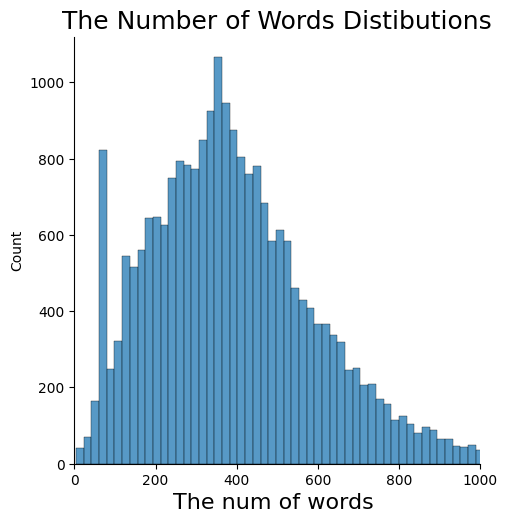

In [61]:
plt.figure(figsize=(8,8))

sns.displot(df['count'])

plt.xlim(0,1000)
plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distibutions", fontsize = 18)
plt.show()

#### Applying Label Encoder to encode the labels of rest of the columns

In [62]:
# Define mapping from original values to user-specific encoded values
encoding_map_bool = {'f': 0, 't': 1}
encoding_map_employment_type = {'Other': 0, 'Full-time': 1, 'Part-time':2, 'Contract':3, 'Temporary':4}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding using mapping
df['telecommuting'] = df['telecommuting'].map(encoding_map_bool)
df['has_company_logo'] = df['has_company_logo'].map(encoding_map_bool)
df['has_questions'] = df['has_questions'].map(encoding_map_bool)
df['fraudulent'] = df['fraudulent'].map(encoding_map_bool)
df['employment_type'] = df['employment_type'].map(encoding_map_employment_type)

# Fit LabelEncoder and Transform
df['required_experience'] = label_encoder.fit_transform(df['required_experience']) 
df['required_education'] = label_encoder.fit_transform(df['required_education'])
df['function'] = label_encoder.fit_transform(df['function'])
df['country'] = label_encoder.fit_transform(df['country'])

df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,title_company_profile_description_requirements_benefits,clean_title_company_profile_description_requirements_benefits,count
0,NaN,0,1,0,0.0,4,13,NaN,22,0,85,"Marketing Intern <h3>We're Food52, and we've c...",marketing intern we are food and we have creat...,416
1,NaN,0,1,0,1.0,6,13,Marketing and Advertising,7,0,60,Customer Service - Cloud Video Production <h3>...,customer service cloud video production second...,888
2,NaN,0,1,0,NaN,7,13,NaN,37,0,85,Commissioning Machinery Assistant (CMA) <h3></...,commissioning machinery assistant cma valor se...,384
3,NaN,0,1,0,1.0,5,1,Computer Software,31,0,85,Account Executive - Washington DC <p>Our passi...,account executive washington dc our passion fo...,774
4,NaN,0,1,1,1.0,5,1,Hospital & Health Care,16,0,85,Bill Review Manager <p>SpotSource Solutions LL...,bill review manager spotsource solutions llc i...,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,0,1,0,1.0,7,13,Hospitality,31,1,85,HSE Manager <p>The maintenance supervisor is ...,hse manager the maintenance supervisor is resp...,308
4996,2000-3000,0,0,1,1.0,2,13,Marketing and Advertising,37,1,85,SAP Support Advisor <p>Colonial is looking fo...,sap support advisor colonial is looking for sh...,116
4997,45000-70000,0,0,1,3.0,5,13,Computer Software,18,1,85,"Informatica/ Etl Tester <p><img src=""#URL_8c6...",informatica etl tester managing over tb of dat...,404
4998,65000-85000,0,1,0,NaN,2,5,NaN,37,1,85,SAP Support Advisor <p><i><b>With decades of e...,sap support advisor with decades of experience...,886


In [63]:
#We will drop all columns that is not required
df = df.drop(['salary_range', 'telecommuting', 'has_company_logo','has_questions','industry','title_company_profile_description_requirements_benefits',
              'required_experience', 'employment_type', 'required_education', 'function', 'country','count'], axis=1)

# Rename the column
df = df.rename(columns={'clean_title_company_profile_description_requirements_benefits': 'texts'})
df

,fraudulent,texts
0,0,marketing intern we are food and we have creat...
1,0,customer service cloud video production second...
2,0,commissioning machinery assistant cma valor se...
3,0,account executive washington dc our passion fo...
4,0,bill review manager spotsource solutions llc i...
...,...,...
4995,1,hse manager the maintenance supervisor is resp...
4996,1,sap support advisor colonial is looking for sh...
4997,1,informatica etl tester managing over tb of dat...
4998,1,sap support advisor with decades of experience...


In [64]:
# Drop rows with NaN values
df.dropna(inplace=True)

# Print the DataFrame after dropping rows with NaN values
df

,fraudulent,texts
0,0,marketing intern we are food and we have creat...
1,0,customer service cloud video production second...
2,0,commissioning machinery assistant cma valor se...
3,0,account executive washington dc our passion fo...
4,0,bill review manager spotsource solutions llc i...
...,...,...
4995,1,hse manager the maintenance supervisor is resp...
4996,1,sap support advisor colonial is looking for sh...
4997,1,informatica etl tester managing over tb of dat...
4998,1,sap support advisor with decades of experience...


In [65]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

In [66]:
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [67]:
data_texts = df['texts'].to_list()

data_labels = df['fraudulent'].to_list()

In [68]:
print(data_texts[0])
print()
print(data_labels[0])

marketing intern we are food and we have created a groundbreaking and award winning cooking site we support connect and celebrate home cooks and give them everything they need in one place we have a top editorial business and engineering team we are focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking we attract the most talented home cooks and contributors in the country we also publish well known professionals like mario batali gwyneth paltrow and danny meyer and we have partnerships with whole foods market and random house food has been named the best food website by the james beard foundation and iacp and has been featured in the new york times npr pando daily techcrunch and on the today show we are located in chelsea in new york city food a fast growing james beard award winning online food community and crowd sourced and curated recipe hub is curren

## Train Test Split

In [69]:
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size = 0.1, random_state=42)

train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size = 0.2, random_state=42)

In [70]:
print(len(train_texts))
print(len(train_labels))

16473
16473


In [71]:
print(len(val_texts))
print(len(val_labels))

2288
2288


In [72]:
print(len(test_texts))
print(len(test_labels))

4119
4119


## Using BERT models

In [73]:
!pip install transformers

In [74]:
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

## Using BERT for tokenizing

In [75]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation = True, padding = True)

val_encodings = tokenizer(val_texts, truncation = True, padding = True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [76]:
# Print the original sentence.

print(' Original: ', train_texts[0])

# Print the sentence split into tokens.
print('\nTokenized: ', tokenizer.tokenize(train_texts[0]))

# Print the sentence mapped to token ids.
print('\nToken IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_texts[0])))

 Original:  janitors sf bay area seeking part time day and night janitors to clean commercial office buildings in antioch emeryville hayward martinez oakland san francisco and santa clara duties include vacuuming dusting cleaning restrooms emptying trash etc six months previous janitorial experience preferred 

Tokenized:  ['jan', '##itors', 'sf', 'bay', 'area', 'seeking', 'part', 'time', 'day', 'and', 'night', 'jan', '##itors', 'to', 'clean', 'commercial', 'office', 'buildings', 'in', 'antioch', 'emery', '##ville', 'hayward', 'martinez', 'oakland', 'san', 'francisco', 'and', 'santa', 'clara', 'duties', 'include', 'vacuum', '##ing', 'dustin', '##g', 'cleaning', 'restroom', '##s', 'empty', '##ing', 'trash', 'etc', 'six', 'months', 'previous', 'jan', '##itor', '##ial', 'experience', 'preferred']

Token IDs:  [5553, 27287, 16420, 3016, 2181, 6224, 2112, 2051, 2154, 1998, 2305, 5553, 27287, 2000, 4550, 3293, 2436, 3121, 1999, 19078, 24294, 3077, 21506, 10337, 9182, 2624, 3799, 1998, 4203, 

## Convert these encodings into Dataset Objects

In [77]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
train_input_ids = []
train_attention_masks = []

# For every sentence...
for sent in train_texts:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    train_input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    train_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
train_input_ids = torch.cat(train_input_ids, dim=0)
train_attention_masks = torch.cat(train_attention_masks, dim=0)
train_labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_texts[0])
print('Token IDs:', train_input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  janitors sf bay area seeking part time day and night janitors to clean commercial office buildings in antioch emeryville hayward martinez oakland san francisco and santa clara duties include vacuuming dusting cleaning restrooms emptying trash etc six months previous janitorial experience preferred 
Token IDs: tensor([  101,  5553, 27287, 16420,  3016,  2181,  6224,  2112,  2051,  2154,
         1998,  2305,  5553, 27287,  2000,  4550,  3293,  2436,  3121,  1999,
        19078, 24294,  3077, 21506, 10337,  9182,  2624,  3799,  1998,  4203,
        10254,  5704,  2421, 11641,  2075, 24337,  2290,  9344, 28249,  2015,
         4064,  2075, 11669,  4385,  2416,  2706,  3025,  5553, 15660,  4818,
         3325,  6871,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     

In [78]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
val_input_ids = []
val_attention_masks = []

# For every sentence...
for sent in val_texts:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    val_input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    val_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
val_input_ids = torch.cat(val_input_ids, dim=0)
val_attention_masks = torch.cat(val_attention_masks, dim=0)
val_labels = torch.tensor(val_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', val_texts[0])
print('Token IDs:', val_input_ids[0])

Original:  payroll data coordinator positions earn daily we are a full service marketing and staffing firm serving companies ranging from fortune to new start up organizations we work with job seekers in an equally broad range from light industrial temporary workers to executive level candidates are you looking for a work from home opportunity where you can earn up to and more per week our online service representative position would be perfect for you set your own hours make money every time you decide to work work remotely from home get paid weekly if you have a computer with internet this is for you requirements all you need is access to the internet and you can participate computer with internet access valid email address good typing skills this is an entry level position and we offer full online training you do not need any special skills to get started earn as much as you can doing data entry complete training provided before you start working and it is easy to start do not let t

In [79]:
from torch.utils.data import TensorDataset

# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)

val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)

In [80]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 16

# Create the DataLoaders training and validation sets.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )


## BERT base model (uncased)

In [81]:
# Load BertForSequenceClassification 
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased', 
    num_labels = 2,   # The number of output labels--2 for binary classification.
    output_attentions = False, 
    output_hidden_states = False, 
)

# Tell pytorch to run this model on the GPU.
model.cuda()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [82]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8
                )

In [83]:
epochs = 10

# Total number of training steps is [number of batches] x [number of epochs].
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [84]:
# Function to calculate the accuracy of predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [85]:
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [86]:
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

best_validation_accuracy = 0.0

for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 50 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)

            #  progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
            
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        # forward pass .
        result = model(b_input_ids,
                       token_type_ids=None,
                       attention_mask=b_input_mask,
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        total_train_loss += loss.item()

        # =backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode
    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():

            # Forward pass
            result = model(b_input_ids,
                           token_type_ids=None,
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model.
        loss = result.loss
        logits = result.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    
    # Save the best model
    if avg_val_accuracy > best_validation_accuracy:
        best_validation_accuracy = avg_val_accuracy
        torch.save(model.state_dict(), 'best_model.pth')

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 10 ========
Training...
  Batch    50  of  1,030.    Elapsed: 0:00:20.
  Batch   100  of  1,030.    Elapsed: 0:00:39.
  Batch   150  of  1,030.    Elapsed: 0:00:58.
  Batch   200  of  1,030.    Elapsed: 0:01:17.
  Batch   250  of  1,030.    Elapsed: 0:01:36.
  Batch   300  of  1,030.    Elapsed: 0:01:55.
  Batch   350  of  1,030.    Elapsed: 0:02:14.
  Batch   400  of  1,030.    Elapsed: 0:02:33.
  Batch   450  of  1,030.    Elapsed: 0:02:51.
  Batch   500  of  1,030.    Elapsed: 0:03:10.
  Batch   550  of  1,030.    Elapsed: 0:03:29.
  Batch   600  of  1,030.    Elapsed: 0:03:48.
  Batch   650  of  1,030.    Elapsed: 0:04:07.
  Batch   700  of  1,030.    Elapsed: 0:04:26.
  Batch   750  of  1,030.    Elapsed: 0:04:45.
  Batch   800  of  1,030.    Elapsed: 0:05:04.
  Batch   850  of  1,030.    Elapsed: 0:05:23.
  Batch   900  of  1,030.    Elapsed: 0:05:42.
  Batch   950  of  1,030.    Elapsed: 0:06:01.
  Batch 1,000  of  1,030.    Elapsed: 0:06:20.

  Average train

### Training statistics

In [87]:
# Display floats with two decimal places.
pd.describe_option('precision')

# pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

df_stats = df_stats.set_index('epoch')

df_stats

display.precision : int
    Floating point output precision in terms of number of places after the
    decimal, for regular formatting as well as scientific notation. Similar
    to ``precision`` in :meth:`numpy.set_printoptions`.
    [default: 6] [currently: 6]
styler.format.precision : int
    The precision for floats and complex numbers.
    [default: 6] [currently: 6]


,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.118402,0.040640,0.988199,0:06:31,0:00:18
2,0.040248,0.037649,0.987325,0:06:30,0:00:17
3,0.016025,0.052997,0.991259,0:06:30,0:00:18
4,0.007738,0.066867,0.991696,0:06:30,0:00:18
5,0.004965,0.068206,0.991696,0:06:30,0:00:17
6,0.002012,0.081869,0.990385,0:06:30,0:00:17
7,0.002434,0.074422,0.992133,0:06:30,0:00:18
8,0.001562,0.070505,0.991696,0:06:30,0:00:17
9,0.000382,0.067905,0.993007,0:06:30,0:00:18


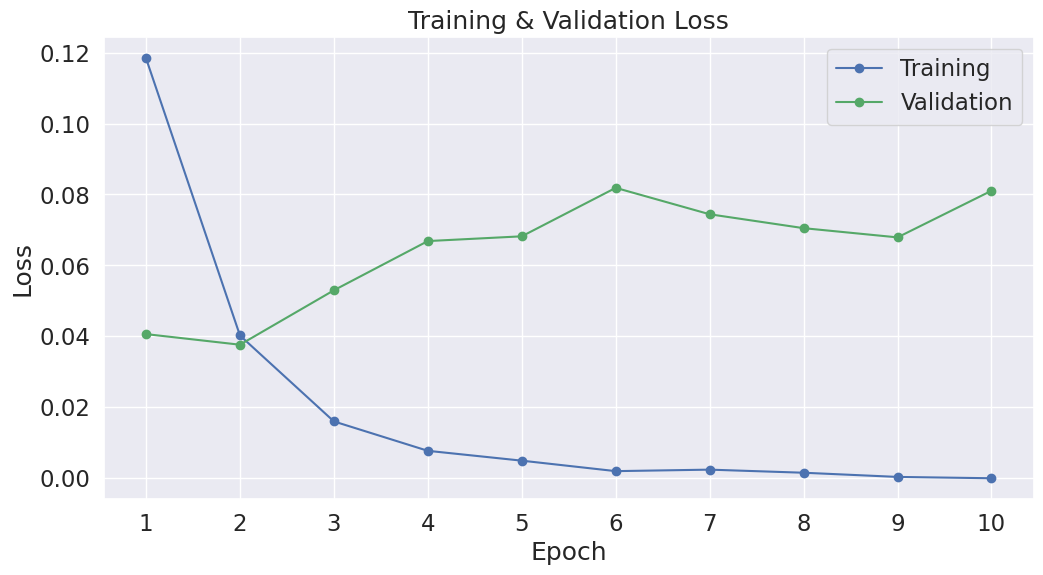

In [88]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

x_labels = list(range(1,epochs+1))
plt.xticks(x_labels)

# Save the plot to a file
plt.savefig('images/training_loss.png')

plt.show()

## Evaluating on Test Dataset

In [89]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
test_input_ids = []
test_attention_masks = []

# For every sentence...
for sent in test_texts:
   
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,          # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    test_input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    test_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
test_labels = torch.tensor(test_labels)

# Set the batch size.
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [90]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Load the saved model
model.load_state_dict(torch.load('best_model.pth'))
model.eval()  # Set the model to evaluation mode

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    
    # Telling the model not to compute or store gradients, saving memory and
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions.
        result = model(b_input_ids,
                     token_type_ids=None,
                     attention_mask=b_input_mask,
                     return_dict=True)
        
    logits = result.logits
    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

Predicting labels for 4,119 test sentences...


## Evaluating the model

In [91]:
# Combine the results across all batches.
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

### F1 Score

In [92]:
# Calculate the F1 score
f1 = f1_score(flat_true_labels, flat_predictions)
print('F1 Score: %.3f' % f1)

F1 Score: 0.982


### Accuracy score

In [93]:
# Calculate the Accuracy score
accuracy = accuracy_score(flat_true_labels, flat_predictions)
print('Accuracy Score: %.3f' % accuracy)

Accuracy Score: 0.991


In [94]:
target_names = ['Non fradulent', 'Fradulent']
print(classification_report(flat_true_labels, flat_predictions, target_names=target_names))

               precision    recall  f1-score   support

Non fradulent       0.99      0.99      0.99      3088
    Fradulent       0.98      0.98      0.98      1031

     accuracy                           0.99      4119
    macro avg       0.99      0.99      0.99      4119
 weighted avg       0.99      0.99      0.99      4119



## Displaying the Confusion Metric

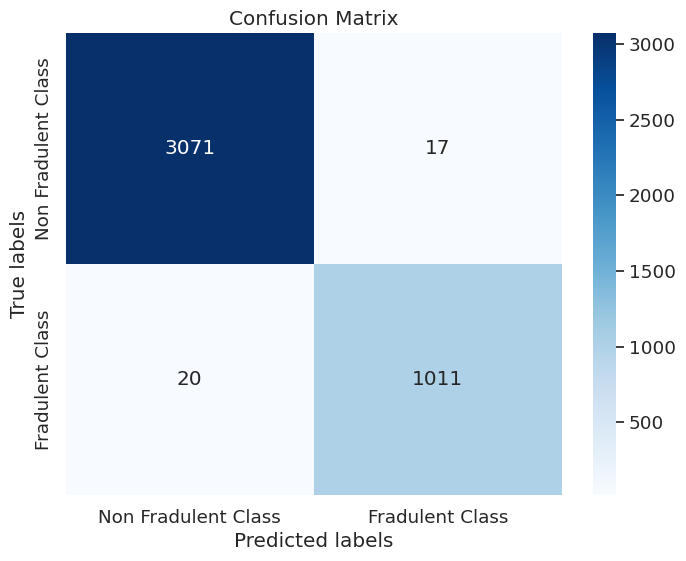

In [95]:
# Calculate confusion matrix
cm = confusion_matrix(flat_true_labels, flat_predictions)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Non Fradulent Class', 'Fradulent Class'],
            yticklabels=['Non Fradulent Class', 'Fradulent Class'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save the plot to a file
plt.savefig('images/heat_map.png')

plt.show()

## Visualising Accuracy score and F1 score

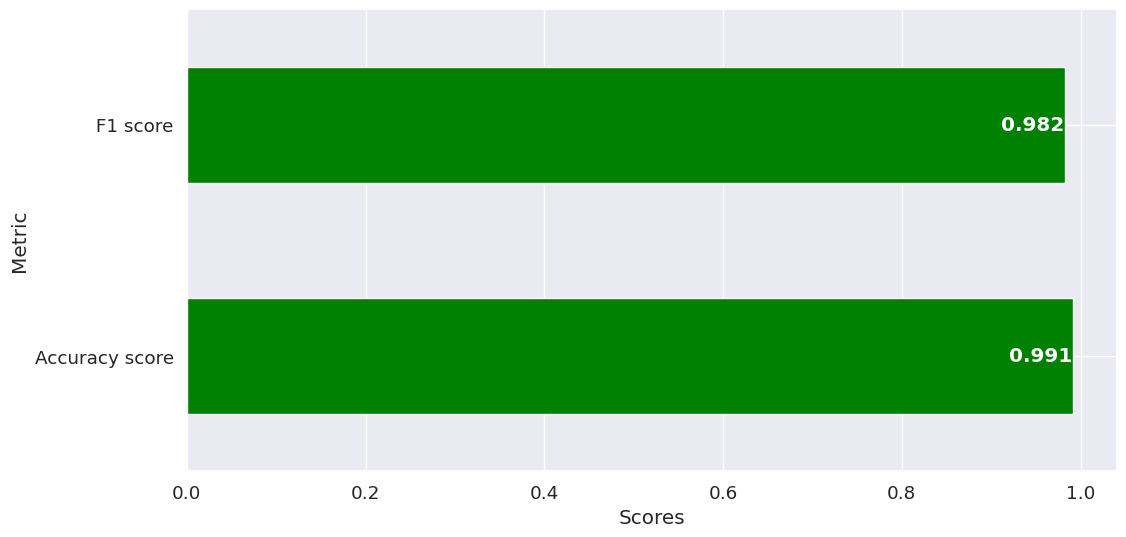

In [120]:
df_score = pd.DataFrame({'Metric': ['Accuracy score', ' F1 score'], 'score': [accuracy, f1]})
ax = df_score.plot.barh(x='Metric', y='score', color='green')


metric = ['Accuracy score', ' F1 score']
score = [accuracy, f1]

# Create horizontal bar plot
# plt.barh(metric, score, color='skyblue')

# Add labels to the bars
for index, value in enumerate(score):
    plt.text(value, index, str(round(value, 3)), ha='right', va='center', color='white', weight='bold')
    
# Add labels to the plot
plt.xlabel('Scores')
plt.ylabel('Metric')
#plt.title('Horizontal Bar Plot with Labels')


# Remove the legend
plt.legend().remove()

# Save the plot to a file
plt.savefig('images/accuracy_scores.png')

# Show plot
plt.show()

In [121]:
import shutil
# Zipping the the images folder
shutil.make_archive('images', 'zip', '/kaggle/working/images')

'/kaggle/working/images.zip'